In [0]:
!pip install -U -q PyDrive
#Installing dataset

# Load the Drive helper and mount
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from scipy import misc # feel free to use another image loader
import matplotlib.pyplot as plt
from PIL import Image
import imageio
import scipy.io
import numpy as np
import os


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

images = {}
segmentations={}
image_ids=[]
# load images
image_file_list = drive.ListFile(
    {'q': "'1VLvTpZgMrO2zBYjDq6F456P6An7es674' in parents"}).GetList()

download_path = os.path.expanduser('~/zew')
try:
  os.makedirs(download_path)
except:
  pass

#load segmentations
segmentation_file_list = drive.ListFile(
    {'q': "'1XUX5YlGfQIdeoxjf20aUaAO5HtDRPGH-' in parents"}).GetList()


for f in image_file_list:
  # 3. Create & download by id
  fname = os.path.join(download_path,f['title'])
  f_ = drive.CreateFile({'id':f['id']})
  f_.GetContentFile(fname) 
  img = imageio.imread(fname)
  images[f['title']] = img;
  image_ids.append(os.path.splitext(f['title'])[0])
  
  
  
for f in segmentation_file_list:
  # 3. Create & download by id
  fname = os.path.join(download_path,f['title'])
  f_ = drive.CreateFile({'id':f['id']})
  f_.GetContentFile(fname) 
#   img = imageio.imread(fname)
  mat = scipy.io.loadmat(fname)
  segmentations[f['title']] = mat;

  


Original Image 0


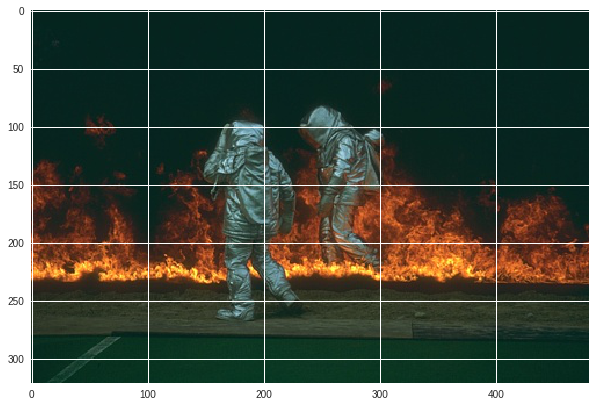

Image has Coverged


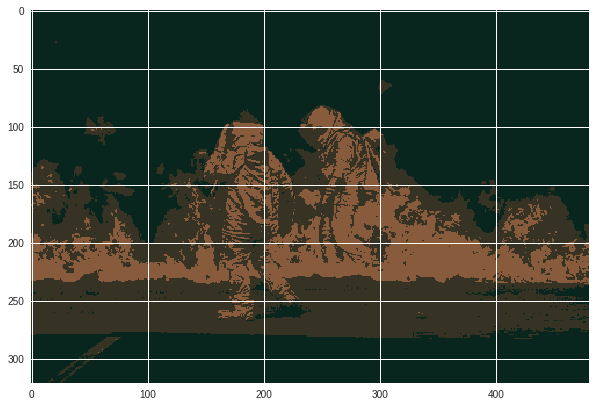

Average F Measure is:[1.82251594] for image: 0 with k = 3
Average Entropy is:1.0660546674035931 for image: 0 with k = 3
Image has Coverged


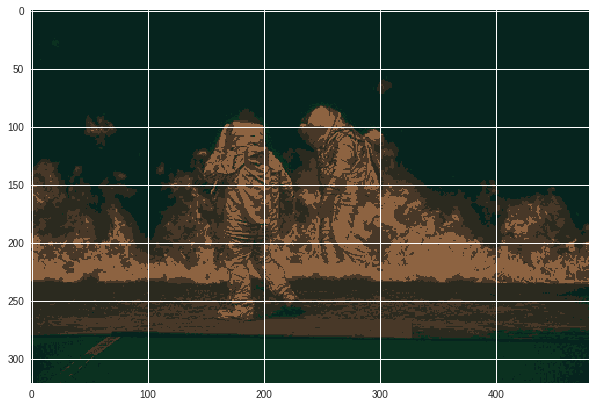

Average F Measure is:[2.94178365] for image: 0 with k = 5
Average Entropy is:0.8172412099652515 for image: 0 with k = 5
Image has Coverged


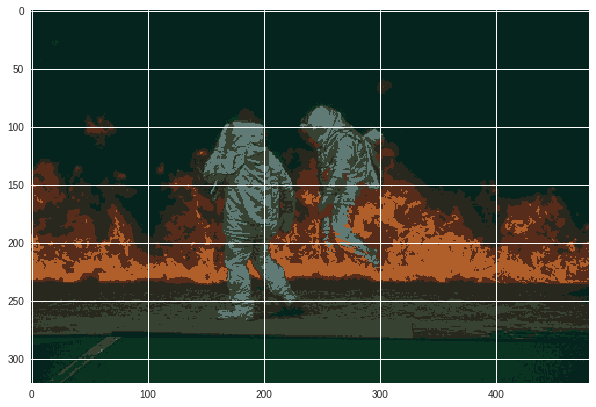

Average F Measure is:[3.97683936] for image: 0 with k = 7
Average Entropy is:0.6613121025030393 for image: 0 with k = 7
Image has Coverged


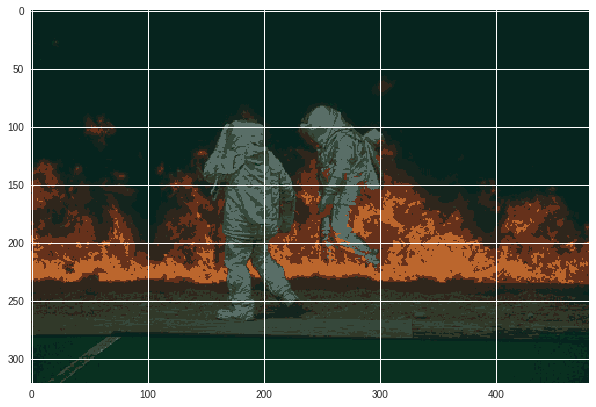

Average F Measure is:[4.2409507] for image: 0 with k = 9
Average Entropy is:0.5820076317241478 for image: 0 with k = 9
Image has Coverged


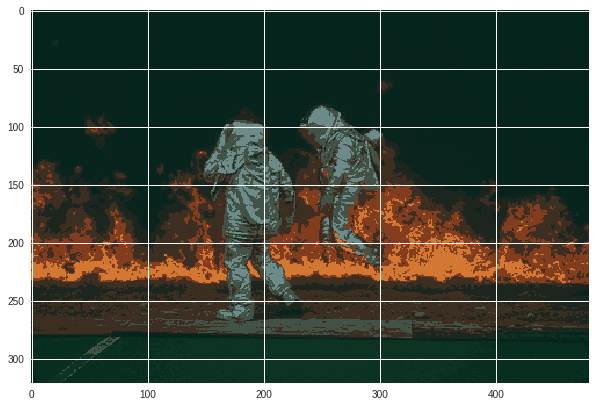

Average F Measure is:[4.70494729] for image: 0 with k = 11
Average Entropy is:0.6412873613978175 for image: 0 with k = 11
Original Image 1


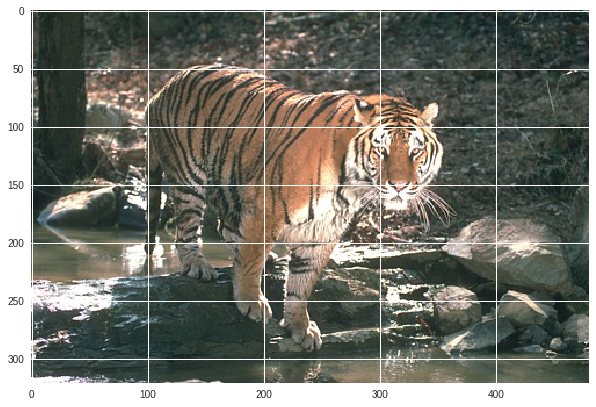

Image has Coverged


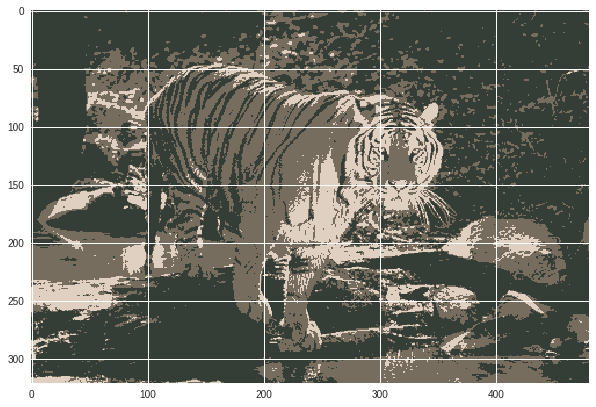

Average F Measure is:[1.31725684] for image: 1 with k = 3
Average Entropy is:1.4761730402315678 for image: 1 with k = 3
Image has Coverged


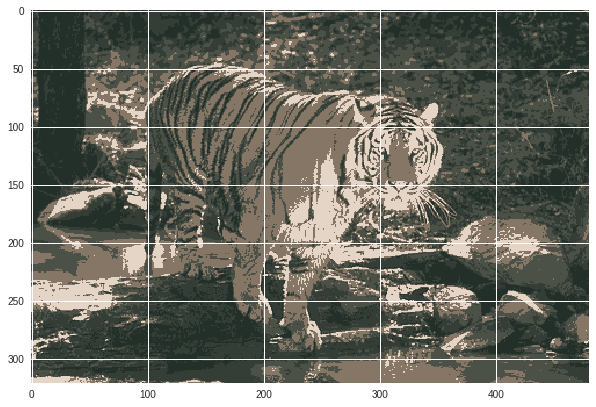

Average F Measure is:[1.76655264] for image: 1 with k = 5
Average Entropy is:1.4297074064889839 for image: 1 with k = 5
Image has Coverged


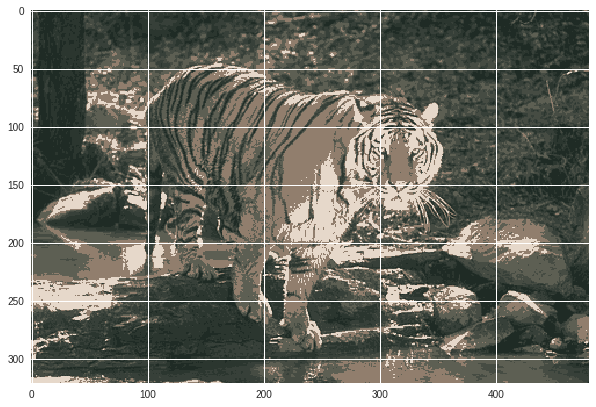

Average F Measure is:[1.94995776] for image: 1 with k = 7
Average Entropy is:1.4217218954132564 for image: 1 with k = 7
Image has Coverged


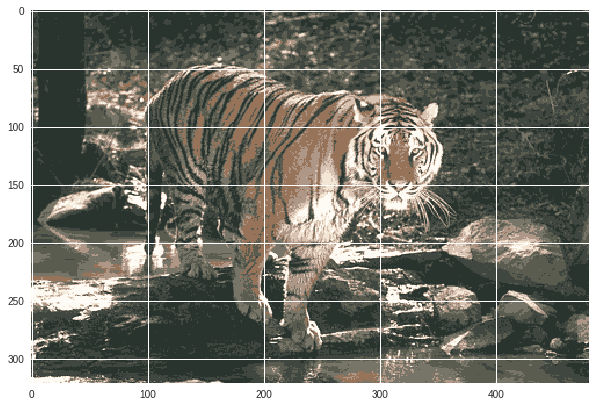

Average F Measure is:[2.04028257] for image: 1 with k = 9
Average Entropy is:1.4042095261541898 for image: 1 with k = 9
Image has Coverged


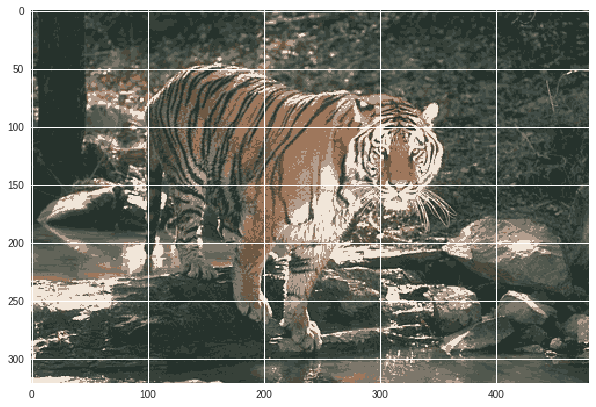

Average F Measure is:[2.33709755] for image: 1 with k = 11
Average Entropy is:1.3525380995255454 for image: 1 with k = 11
Original Image 2


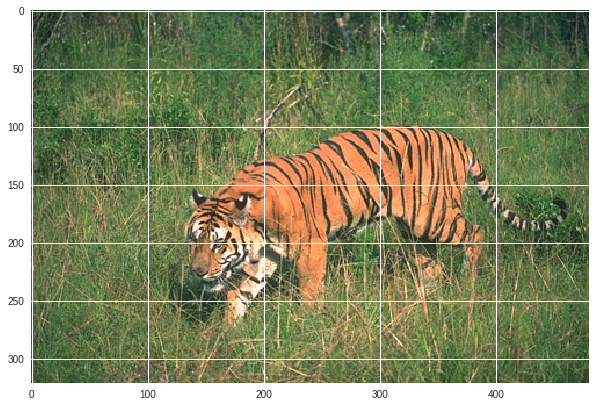

Image has Coverged


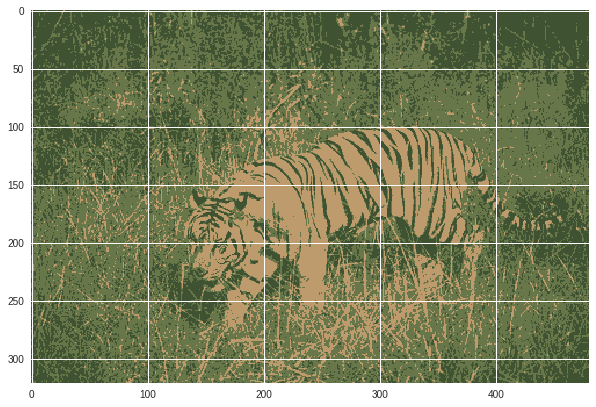

Average F Measure is:[1.79482603] for image: 2 with k = 3
Average Entropy is:0.4367078316971472 for image: 2 with k = 3
Image has Coverged


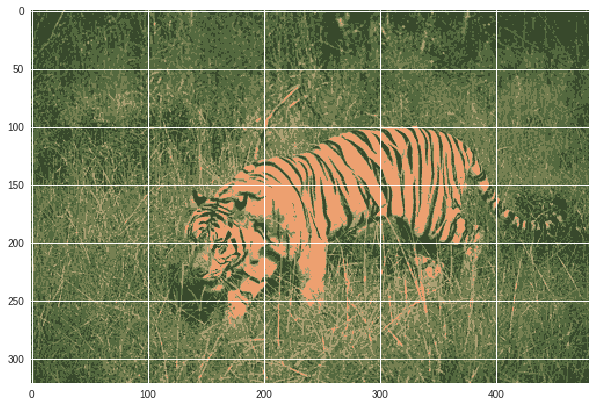

Average F Measure is:[2.13495619] for image: 2 with k = 5
Average Entropy is:0.3851081812100151 for image: 2 with k = 5
Image has Coverged


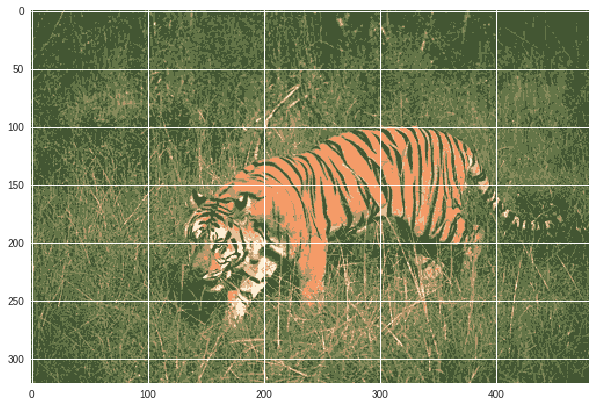

Average F Measure is:[2.18638185] for image: 2 with k = 7
Average Entropy is:0.38339034003846323 for image: 2 with k = 7
Image has Coverged


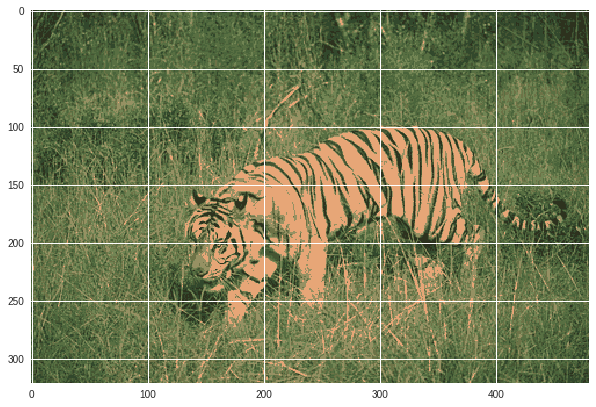

Average F Measure is:[2.34478812] for image: 2 with k = 9
Average Entropy is:0.36855277861795904 for image: 2 with k = 9
Image has Coverged


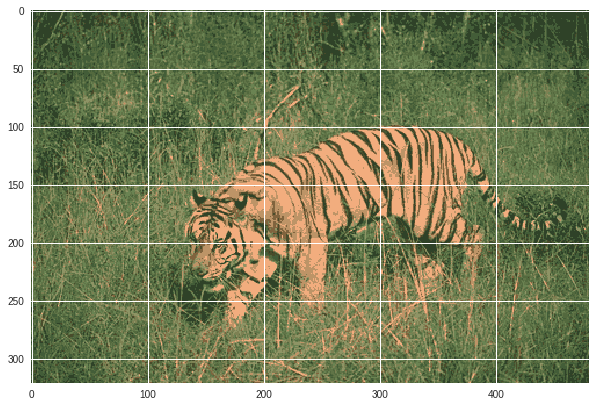

Average F Measure is:[2.70091942] for image: 2 with k = 11
Average Entropy is:0.3271106284218421 for image: 2 with k = 11
Original Image 3


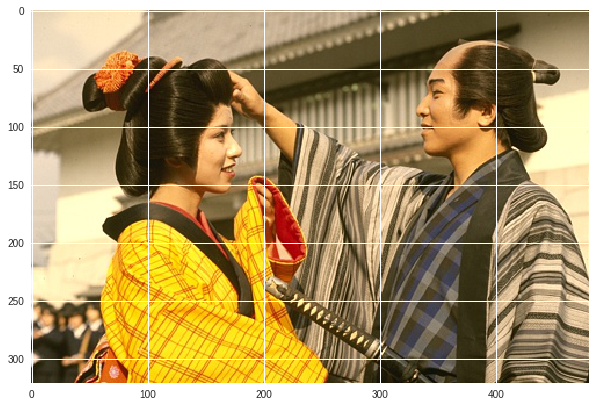

Image has Coverged


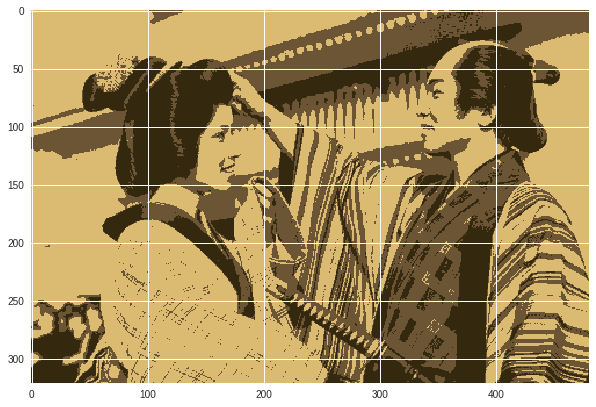

Average F Measure is:[1.06575599] for image: 3 with k = 3
Average Entropy is:2.197517762329108 for image: 3 with k = 3
Image has Coverged


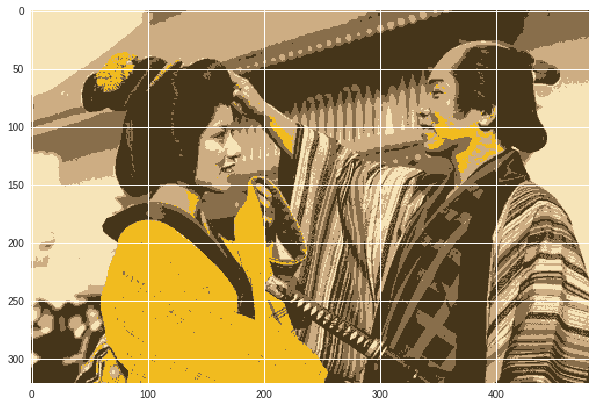

Average F Measure is:[2.12263337] for image: 3 with k = 5
Average Entropy is:1.872221095525085 for image: 3 with k = 5
Image has Coverged


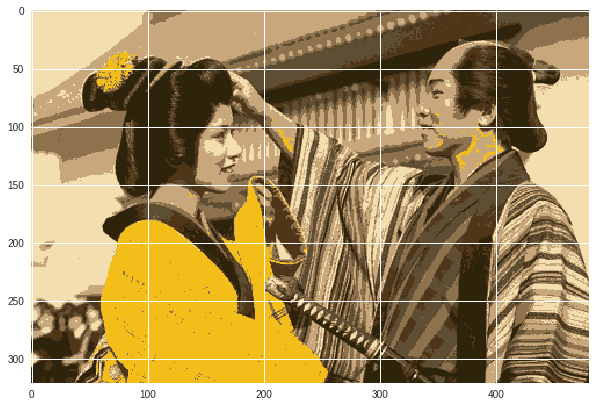

Average F Measure is:[2.60337366] for image: 3 with k = 7
Average Entropy is:1.8272783260679617 for image: 3 with k = 7
Image has Coverged


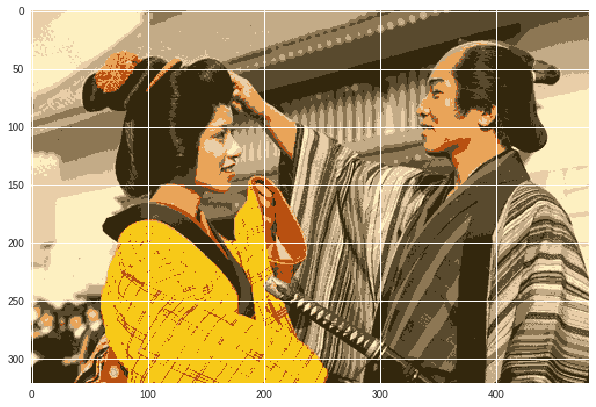

Average F Measure is:[3.20466423] for image: 3 with k = 9
Average Entropy is:1.6702619359911641 for image: 3 with k = 9
Image has Coverged


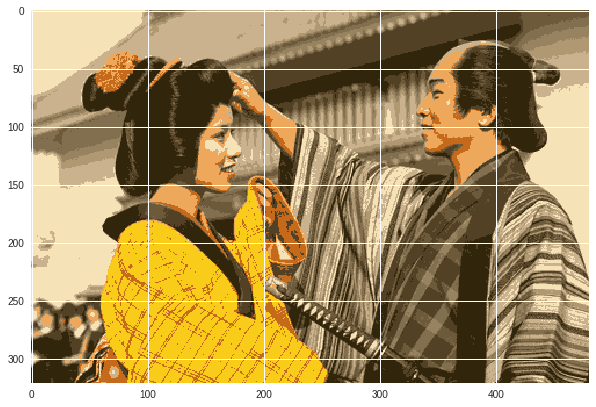

Average F Measure is:[3.39663484] for image: 3 with k = 11
Average Entropy is:1.690440291746242 for image: 3 with k = 11
Original Image 4


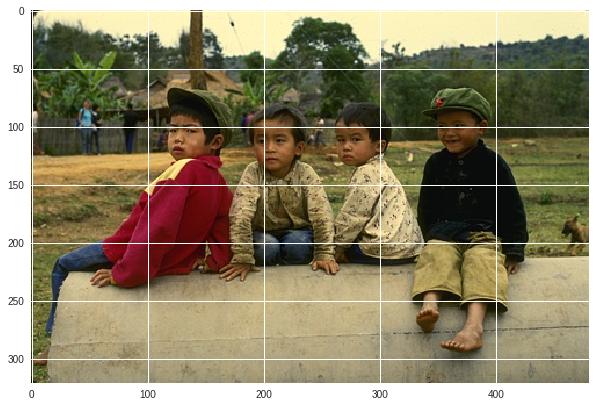

Image has Coverged


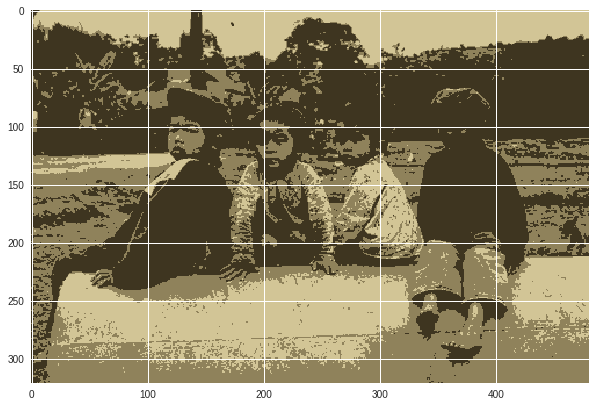

Average F Measure is:[1.4415001] for image: 4 with k = 3
Average Entropy is:2.060151457871744 for image: 4 with k = 3
Image has Coverged


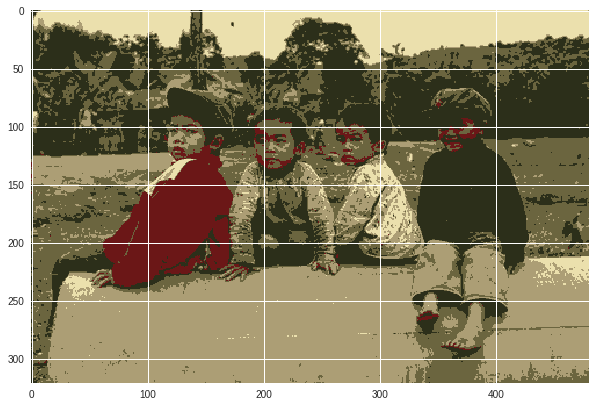

Average F Measure is:[3.06119464] for image: 4 with k = 5
Average Entropy is:1.7721665935925617 for image: 4 with k = 5
Image has Coverged


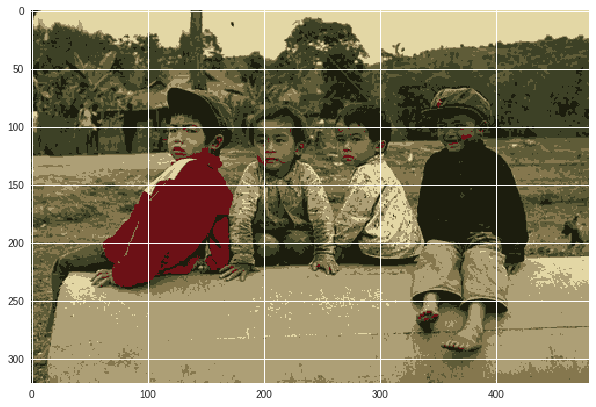

Average F Measure is:[3.75814112] for image: 4 with k = 7
Average Entropy is:1.6913339951996775 for image: 4 with k = 7
Image has Coverged


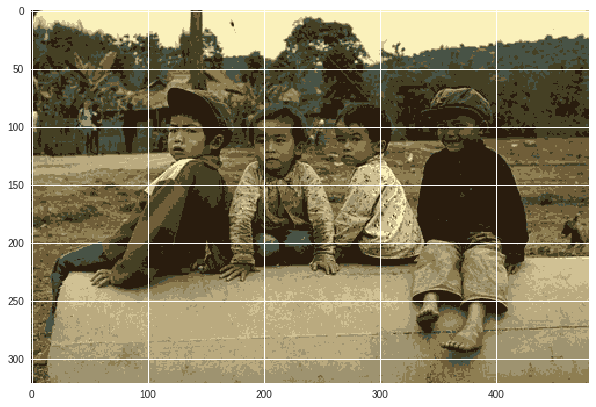

Average F Measure is:[3.60248097] for image: 4 with k = 9
Average Entropy is:1.73046744588788 for image: 4 with k = 9
Image has Coverged


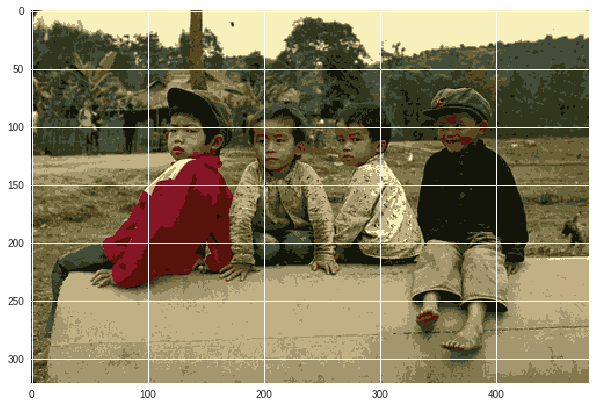

Average F Measure is:[5.06319982] for image: 4 with k = 11
Average Entropy is:1.5739511089510363 for image: 4 with k = 11


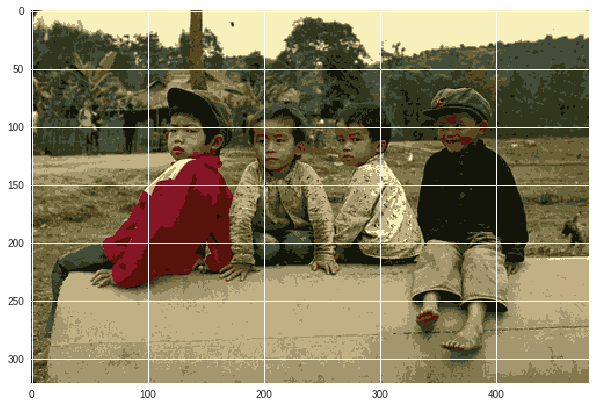

In [0]:
# apply k means segmentation on "5" images and their associated ground truth(s) 
# and calculating f-measure, cross entropy loss
from PIL import Image
import numpy
import math
import random
for i in range(5):
  no_samples = np.shape(segmentations[image_ids[i]+ '.mat']['groundTruth'])[1]
  print(f'Original Image {i}')
  org = images[image_ids[i]+'.jpg']
  aorgplot = plt.imshow(org)
  plt.show()
  image  = Image.fromarray(images[image_ids[i]+'.jpg']).convert('RGB')
  clusters=[[] for i in range(15)]
  # for every input image try different K value.
  ks = [3, 5, 7, 9, 11]
  for k in ks:
    clusters=[[] for i in range(15)]
    res,grey_scale_res= kmeans(image, k)
    img = Image.fromarray(res.astype('uint8'))
    imgplot = plt.imshow(img)
    avg_f=0
    avg_ent=0
    for M in range(no_samples):
      avg_f+=f_measure(grey_scale_res,segmentations[image_ids[i] + '.mat']['groundTruth'][0][M]['Segmentation'][0][0])
      avg_ent+=calculate_conditional_entropy(grey_scale_res,segmentations[image_ids[i] + '.mat']['groundTruth'][0][M]['Segmentation'][0][0])
    avg_f=avg_f/no_samples
    avg_ent=avg_ent/no_samples
    print(f'Average F Measure is:{avg_f}',f'for image: {i}',f'with k = {k}')
    print(f'Average Entropy is:{avg_ent}',f'for image: {i}',f'with k = {k}')
    
    

    


Original Image 0


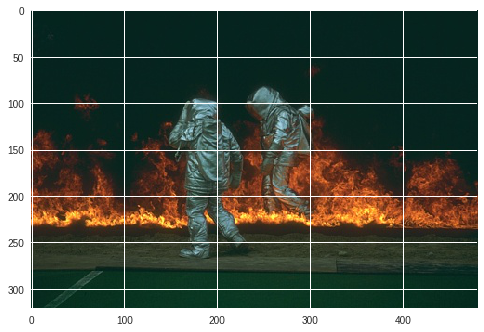

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


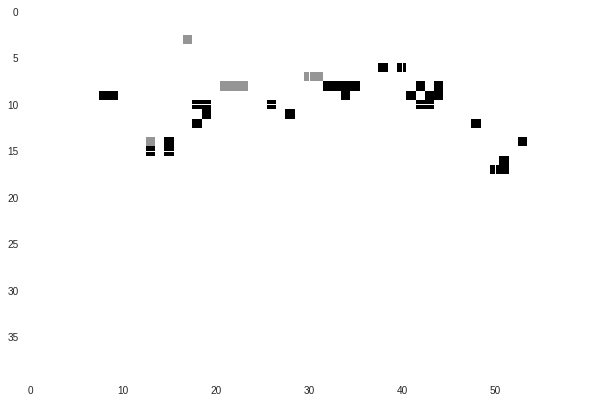

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[0.69515061] for image:0 with k =:3
Average Entropy using neareast neighbours is:1.572873447763381 for image:0 with k =:3


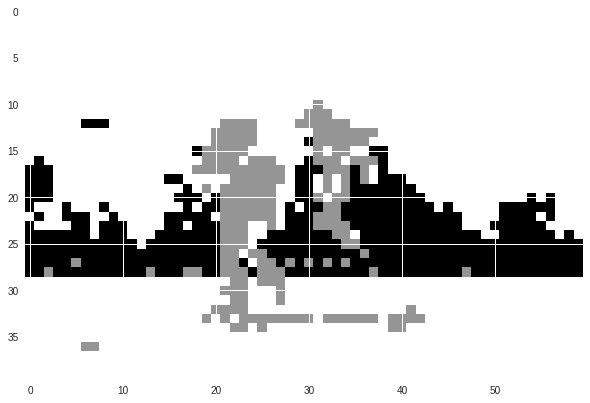

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[1.89532326] for image:0 with k =:3
Average Entropy using rbf gamma 1 is:1.154081555237648 for image:0 with k =:3


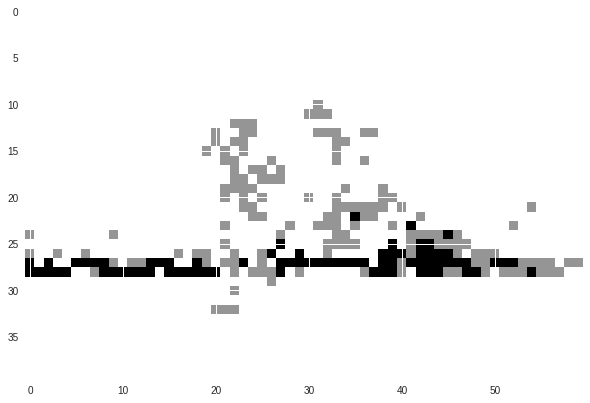

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[1.16143308] for image:0 with k =:3
Average Entropy using rbf gamma 10 is:1.4505816078676652 for image:0 with k =:3


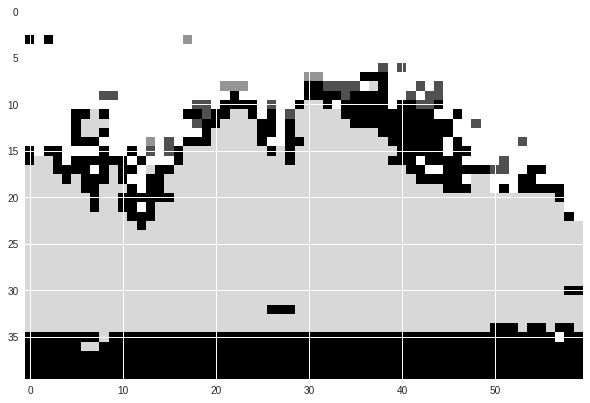

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.00058713] for image:0 with k =:5
Average Entropy using neareast neighbours is:0.9628419092755394 for image:0 with k =:5


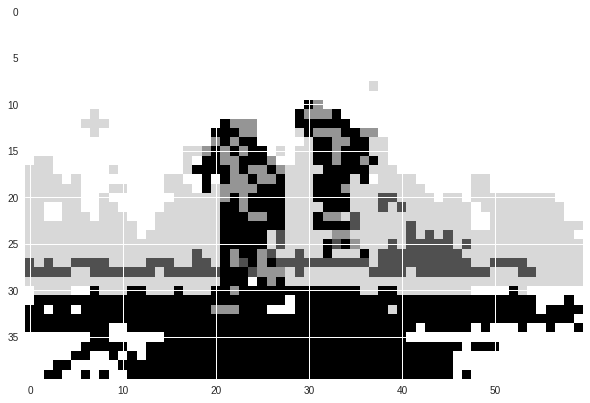

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.61278436] for image:0 with k =:5
Average Entropy using rbf gamma 1 is:0.9058496531170286 for image:0 with k =:5


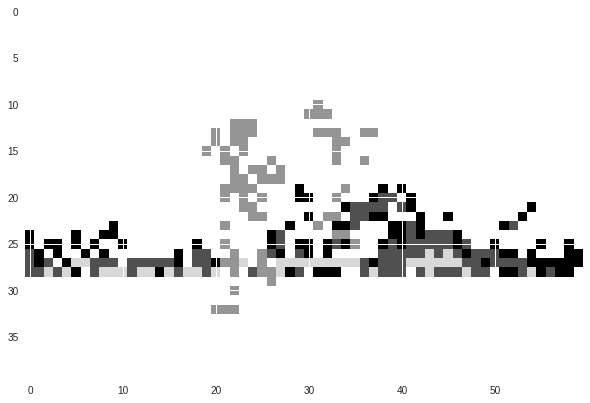

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[1.84608359] for image:0 with k =:5
Average Entropy using rbf gamma 10 is:1.3773346993527738 for image:0 with k =:5


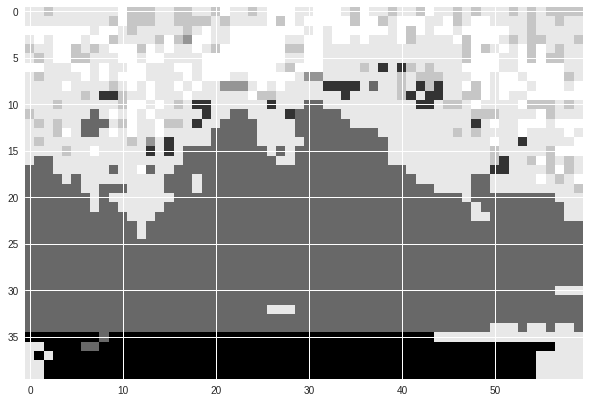

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.57660245] for image:0 with k =:7
Average Entropy using neareast neighbours is:0.8873054770985952 for image:0 with k =:7


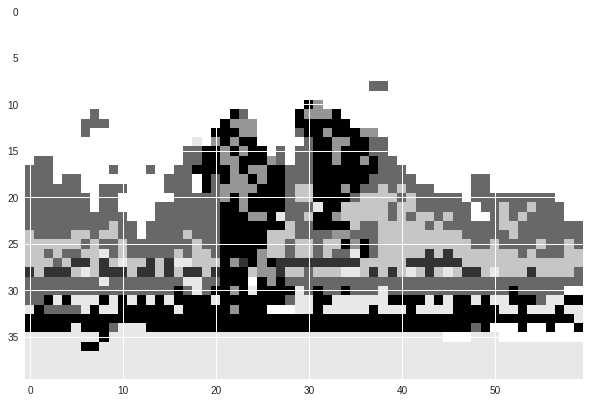

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[3.610688] for image:0 with k =:7
Average Entropy using rbf gamma 1 is:0.6811396047467249 for image:0 with k =:7


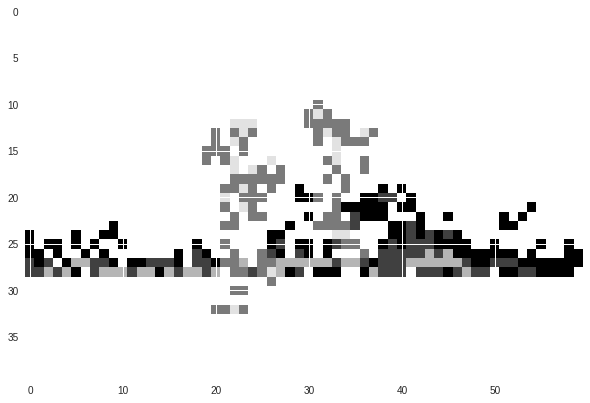

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[2.0056048] for image:0 with k =:7
Average Entropy using rbf gamma 10 is:1.340226622287825 for image:0 with k =:7


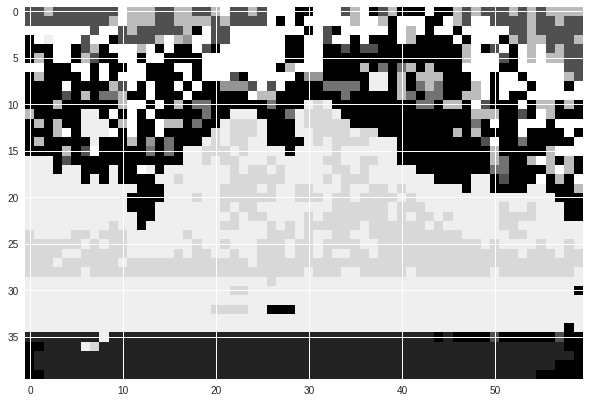

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[3.23691796] for image:0 with k =:9
Average Entropy using neareast neighbours is:0.8036071936043554 for image:0 with k =:9


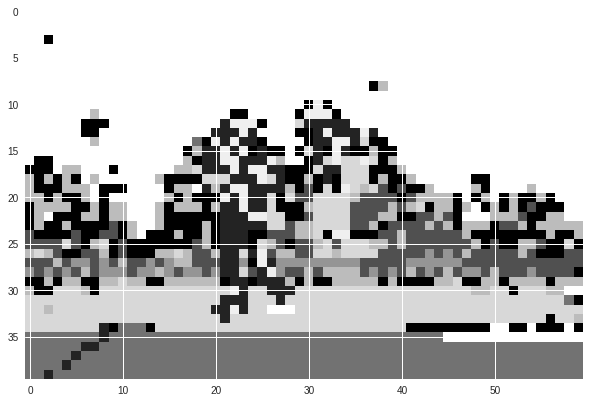

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[4.58547723] for image:0 with k =:9
Average Entropy using rbf gamma 1 is:0.593985192191973 for image:0 with k =:9


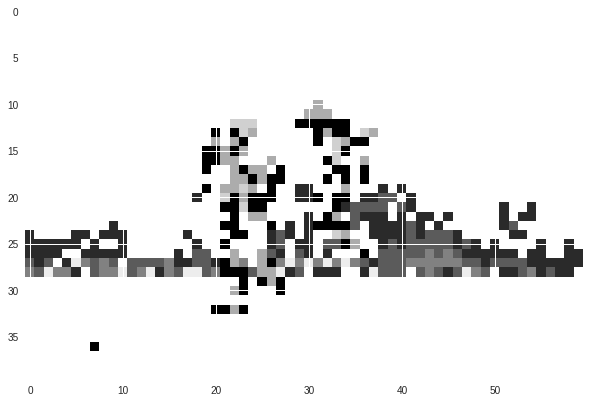

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[2.33849312] for image:0 with k =:9
Average Entropy using rbf gamma 10 is:1.2922926239665613 for image:0 with k =:9


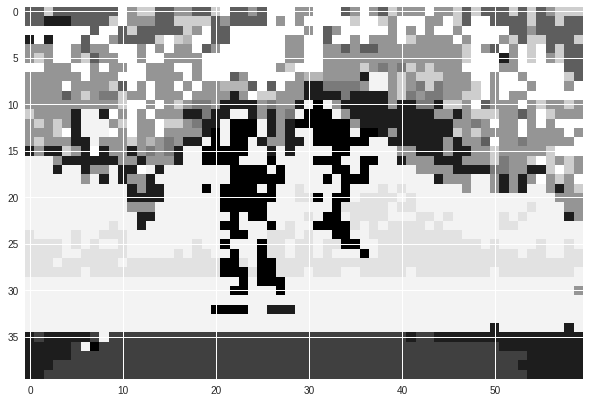

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[3.88311802] for image:0 with k =:11
Average Entropy using neareast neighbours is:0.7114591583054481 for image:0 with k =:11


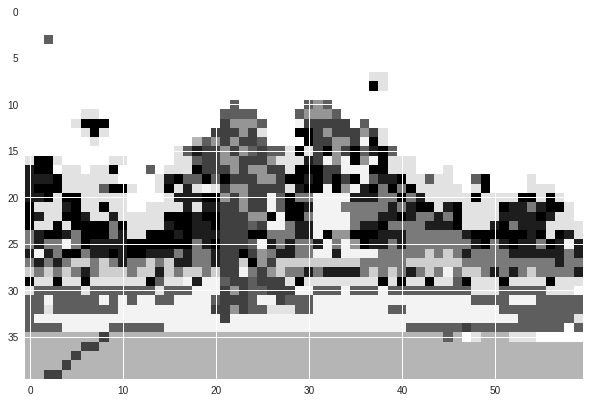

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[4.99439432] for image:0 with k =:11
Average Entropy using rbf gamma 1 is:0.5337274832965784 for image:0 with k =:11


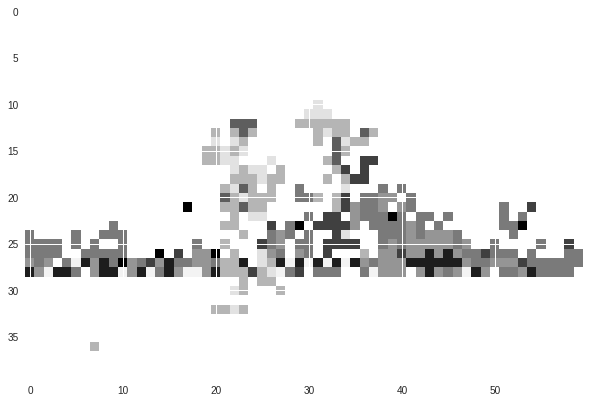

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[2.63777731] for image:0 with k =:11
Average Entropy using rbf gamma 10 is:1.2911665226975817 for image:0 with k =:11
Original Image 1


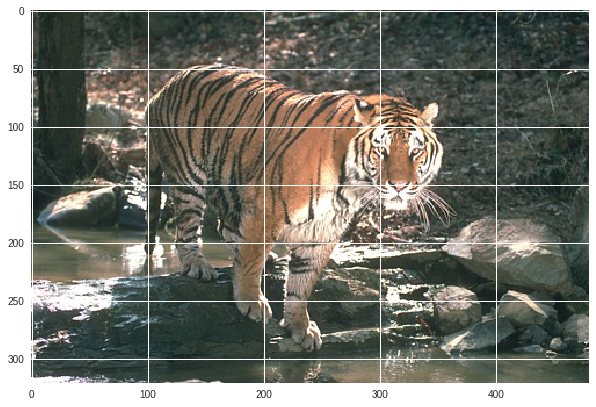

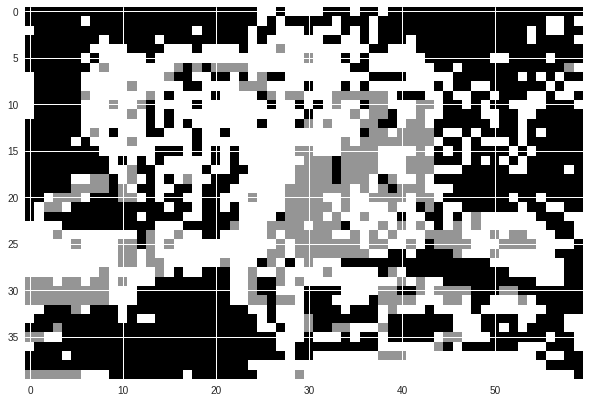

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[1.25695479] for image:1 with k =:3
Average Entropy using neareast neighbours is:1.5093830302090887 for image:1 with k =:3


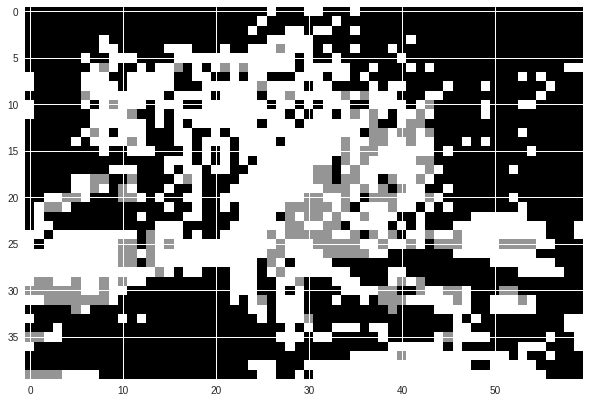

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[1.24690864] for image:1 with k =:3
Average Entropy using rbf gamma 1 is:1.504305679994788 for image:1 with k =:3


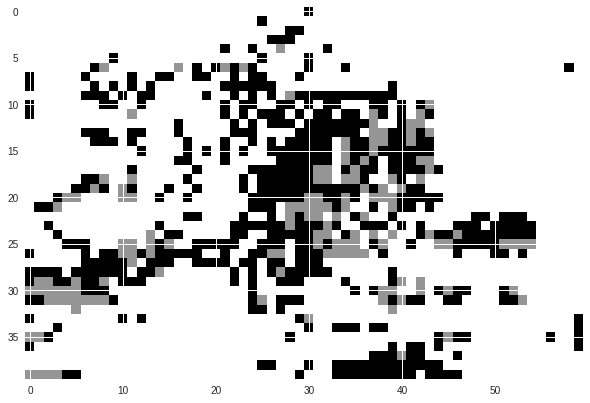

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[1.24403265] for image:1 with k =:3
Average Entropy using rbf gamma 10 is:1.5379759207318728 for image:1 with k =:3


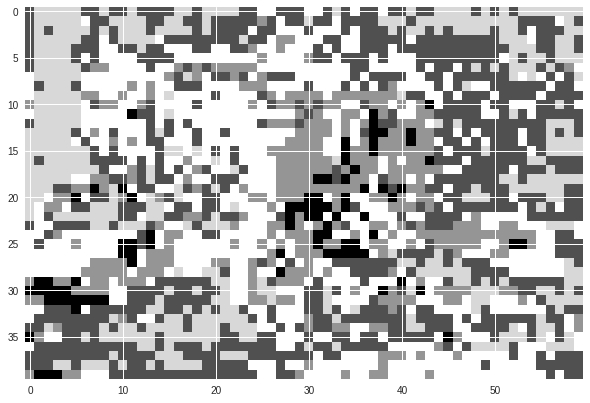

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[1.60929988] for image:1 with k =:5
Average Entropy using neareast neighbours is:1.4622807823103934 for image:1 with k =:5


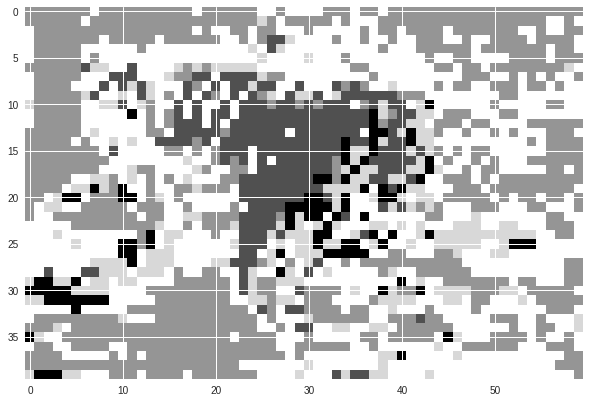

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[1.78880878] for image:1 with k =:5
Average Entropy using rbf gamma 1 is:1.414456901313988 for image:1 with k =:5


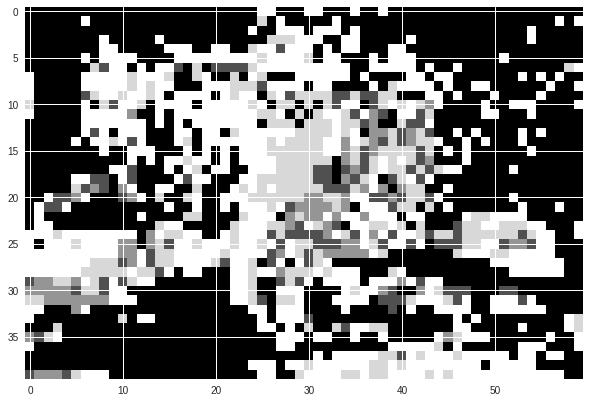

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[1.51426658] for image:1 with k =:5
Average Entropy using rbf gamma 10 is:1.4916928860450978 for image:1 with k =:5


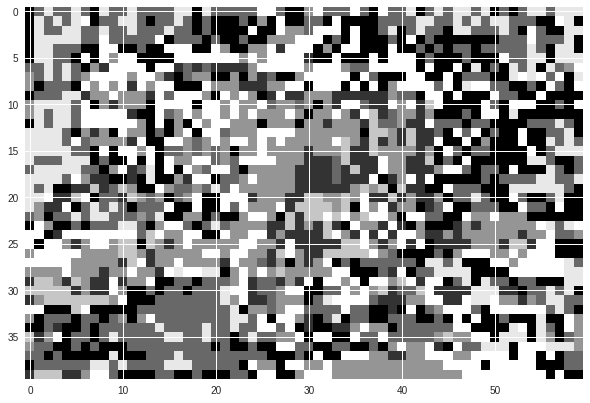

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[1.94368754] for image:1 with k =:7
Average Entropy using neareast neighbours is:1.444622461292332 for image:1 with k =:7


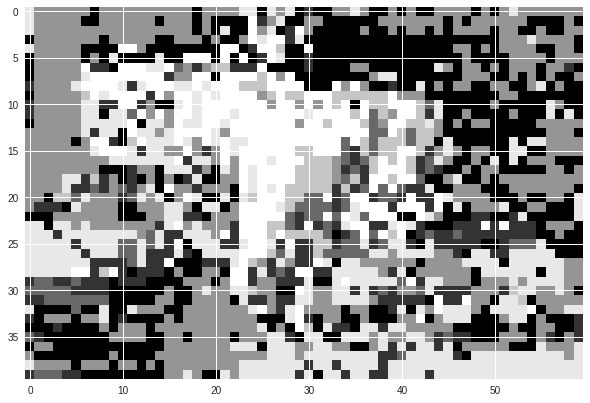

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.17474526] for image:1 with k =:7
Average Entropy using rbf gamma 1 is:1.3335241914607852 for image:1 with k =:7


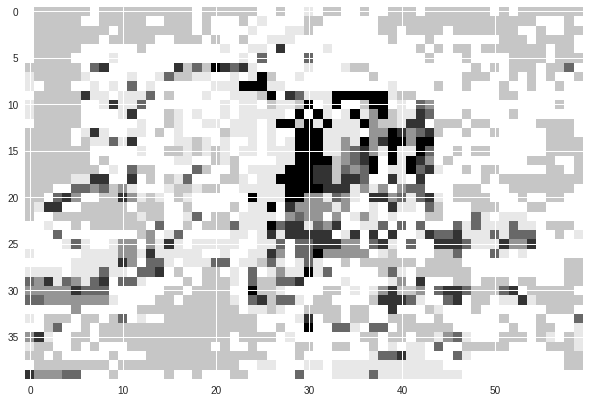

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[1.78442539] for image:1 with k =:7
Average Entropy using rbf gamma 10 is:1.4491643465284836 for image:1 with k =:7


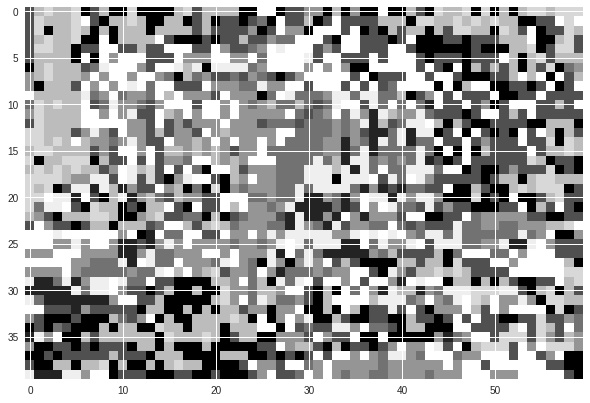

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.1488313] for image:1 with k =:9
Average Entropy using neareast neighbours is:1.4271938503574906 for image:1 with k =:9


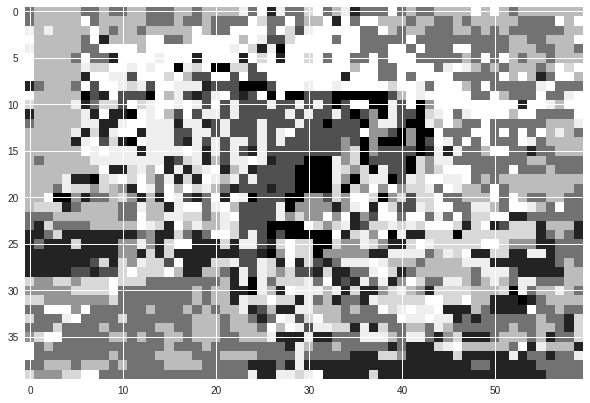

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.45224336] for image:1 with k =:9
Average Entropy using rbf gamma 1 is:1.2694753207600846 for image:1 with k =:9


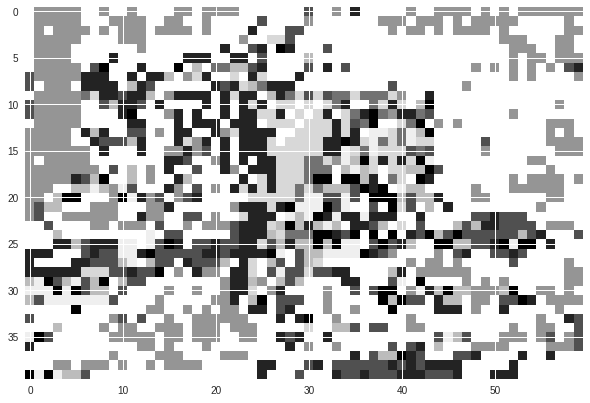

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[1.93615984] for image:1 with k =:9
Average Entropy using rbf gamma 10 is:1.4029844570390335 for image:1 with k =:9


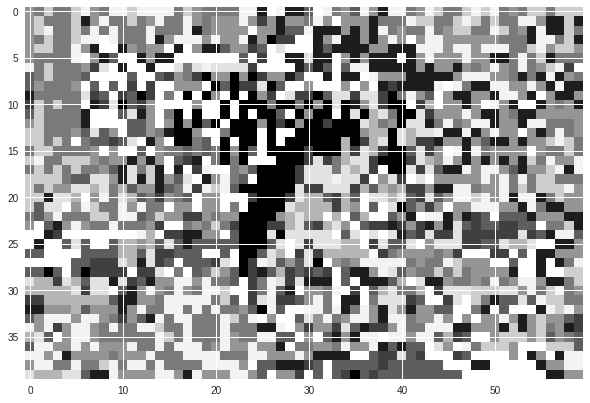

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.31646683] for image:1 with k =:11
Average Entropy using neareast neighbours is:1.3603957258926322 for image:1 with k =:11


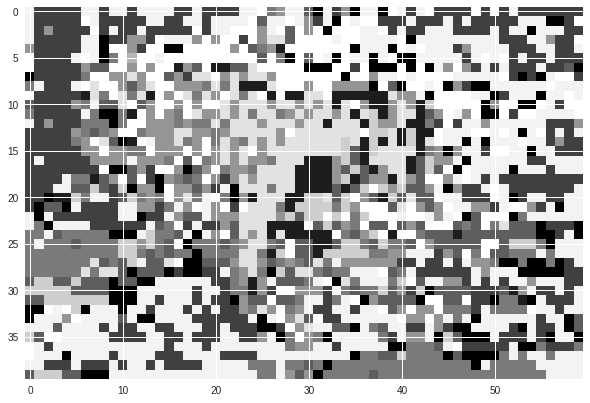

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.58512612] for image:1 with k =:11
Average Entropy using rbf gamma 1 is:1.256215830264911 for image:1 with k =:11


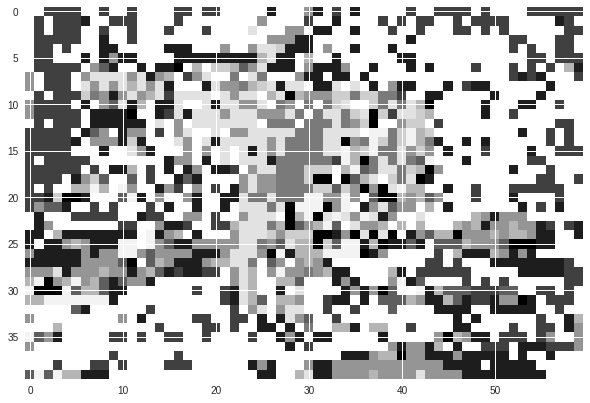

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[2.14139112] for image:1 with k =:11
Average Entropy using rbf gamma 10 is:1.3616955739252252 for image:1 with k =:11
Original Image 2


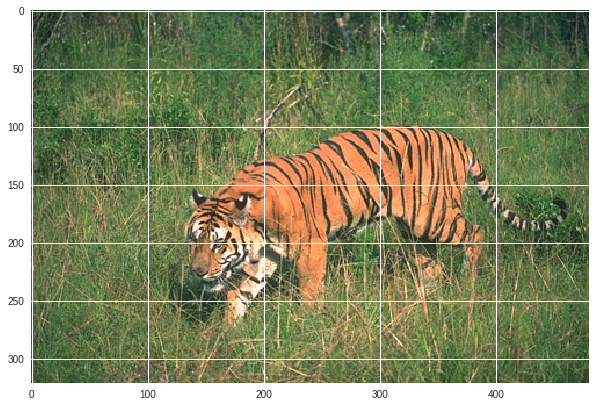

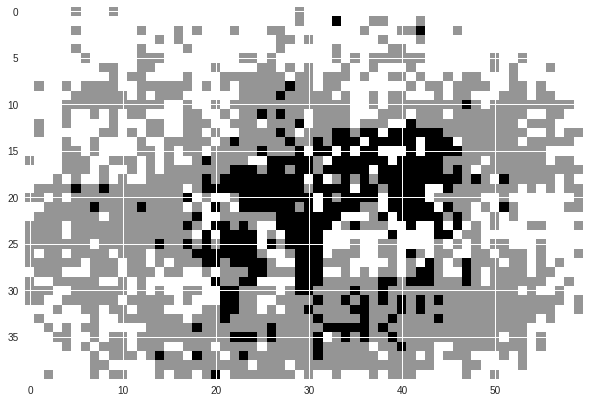

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[1.93850169] for image:2 with k =:3
Average Entropy using neareast neighbours is:0.4219765929951157 for image:2 with k =:3


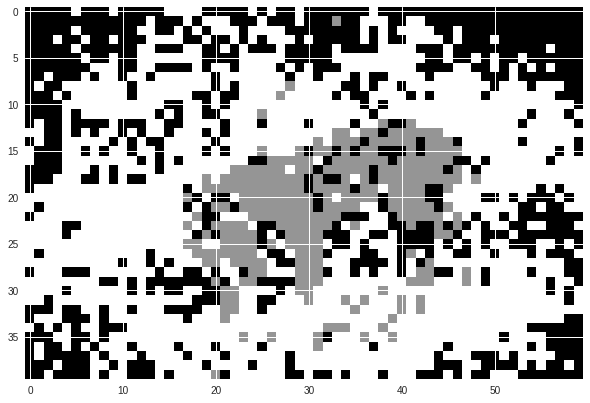

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[1.98540419] for image:2 with k =:3
Average Entropy using rbf gamma 1 is:0.38024926067985027 for image:2 with k =:3


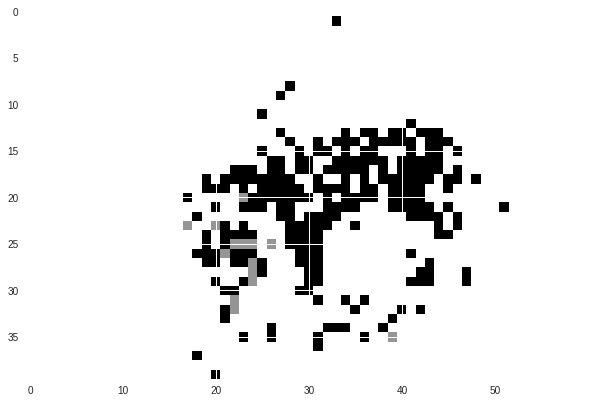

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[1.6630646] for image:2 with k =:3
Average Entropy using rbf gamma 10 is:0.4217711053459528 for image:2 with k =:3


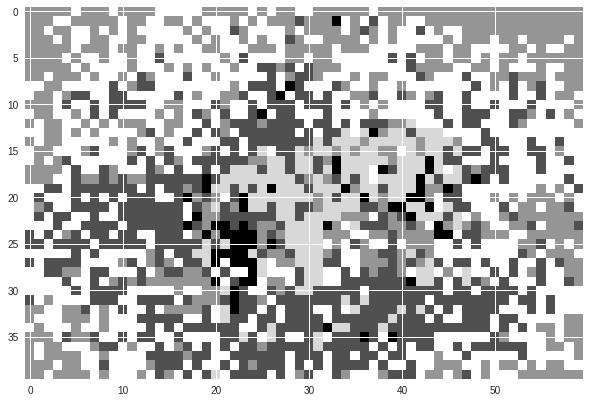

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.25255897] for image:2 with k =:5
Average Entropy using neareast neighbours is:0.3943400980004319 for image:2 with k =:5


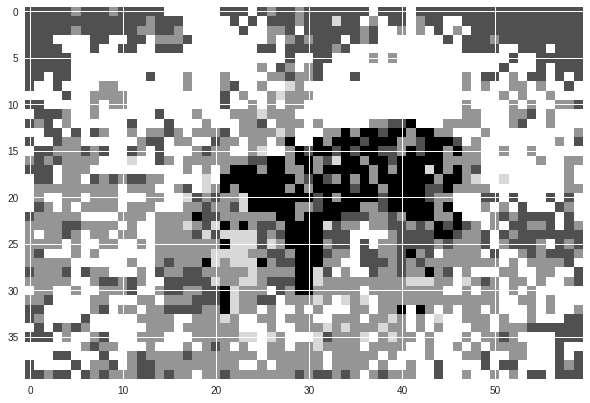

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.1993868] for image:2 with k =:5
Average Entropy using rbf gamma 1 is:0.3664515909992469 for image:2 with k =:5


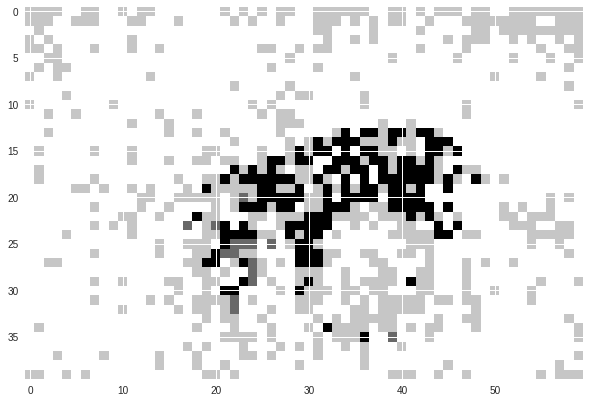

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[1.79724256] for image:2 with k =:5
Average Entropy using rbf gamma 10 is:0.40912131532349666 for image:2 with k =:5


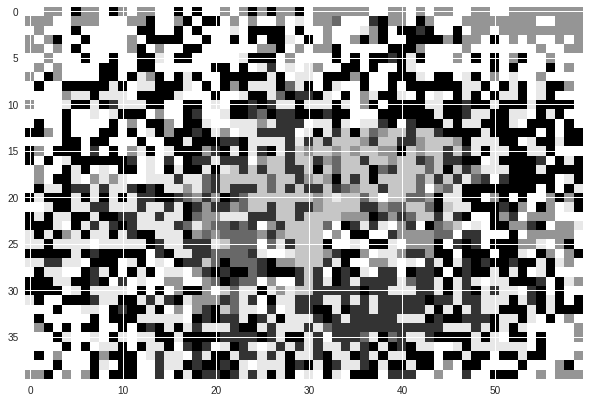

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.35791171] for image:2 with k =:7
Average Entropy using neareast neighbours is:0.3599528357186415 for image:2 with k =:7


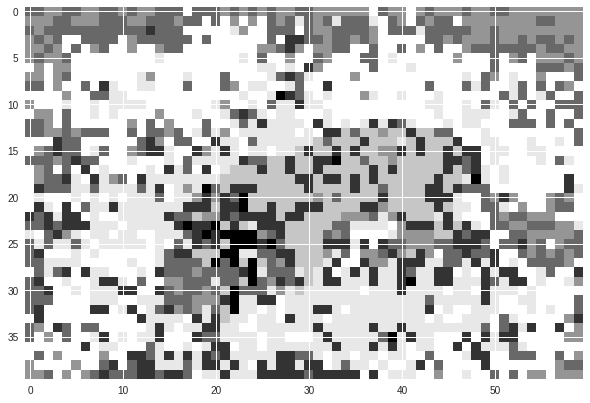

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.32650867] for image:2 with k =:7
Average Entropy using rbf gamma 1 is:0.330265645435619 for image:2 with k =:7


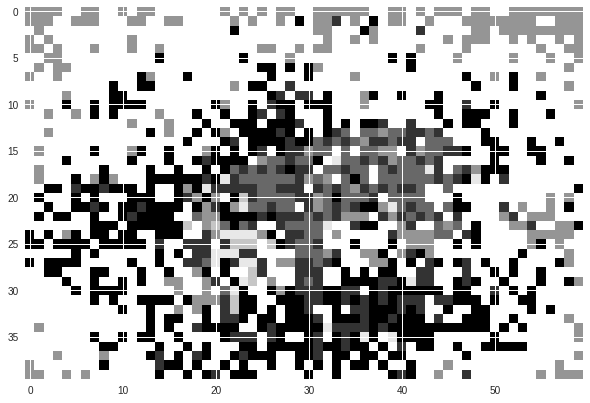

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[2.22290963] for image:2 with k =:7
Average Entropy using rbf gamma 10 is:0.3787453810366834 for image:2 with k =:7


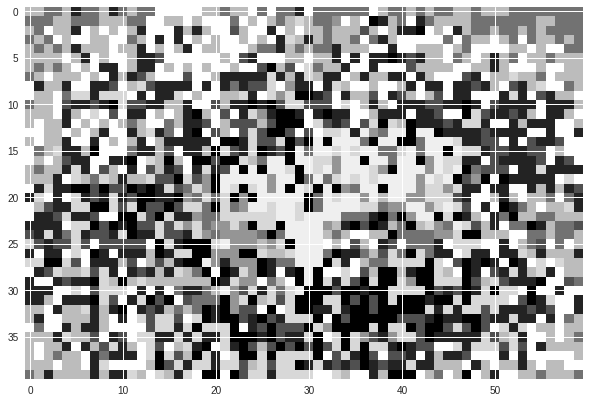

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.44068444] for image:2 with k =:9
Average Entropy using neareast neighbours is:0.34816171599995754 for image:2 with k =:9


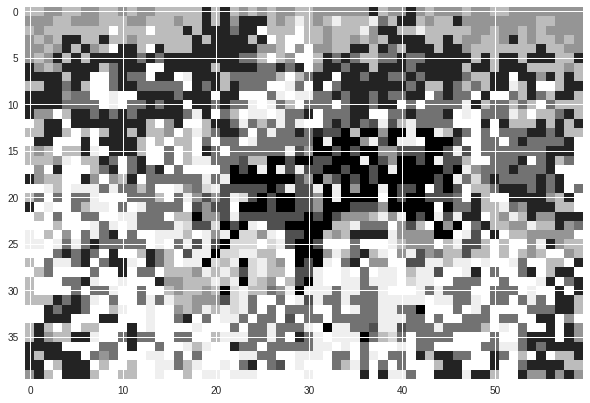

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.63826115] for image:2 with k =:9
Average Entropy using rbf gamma 1 is:0.2997979787766195 for image:2 with k =:9


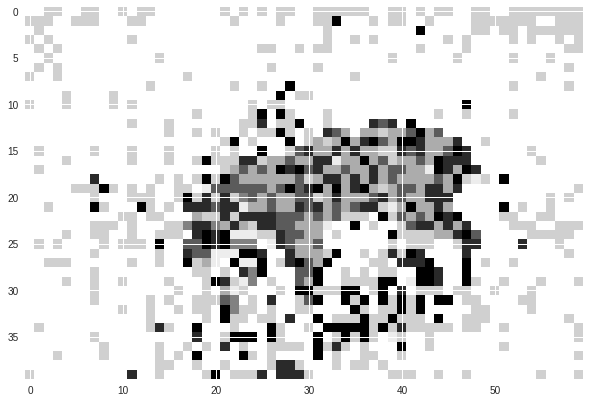

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[2.38653173] for image:2 with k =:9
Average Entropy using rbf gamma 10 is:0.28918543956257237 for image:2 with k =:9


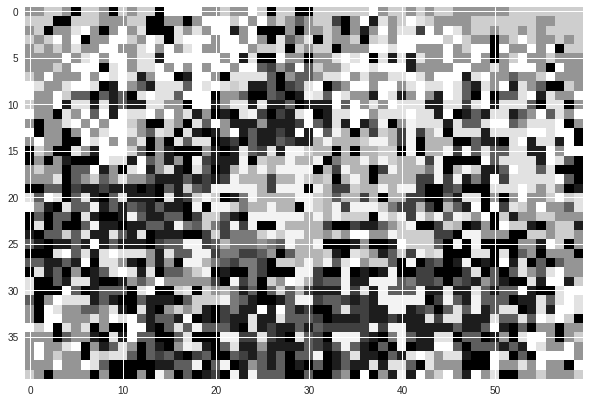

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.629508] for image:2 with k =:11
Average Entropy using neareast neighbours is:0.33812535629694923 for image:2 with k =:11


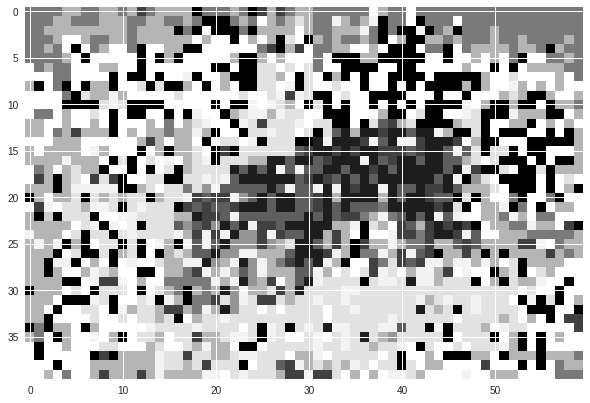

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.73019949] for image:2 with k =:11
Average Entropy using rbf gamma 1 is:0.2851568779205246 for image:2 with k =:11


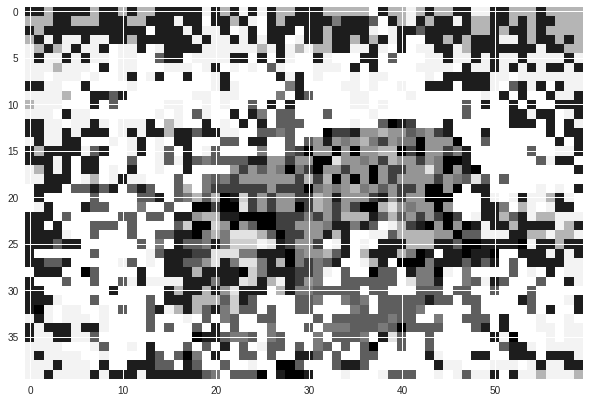

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[2.73163897] for image:2 with k =:11
Average Entropy using rbf gamma 10 is:0.28565321369731755 for image:2 with k =:11
Original Image 3


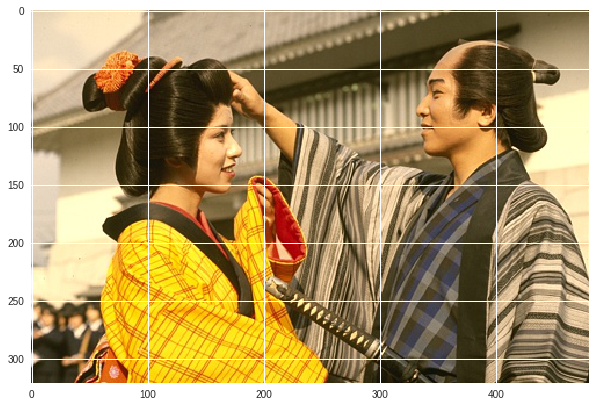

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


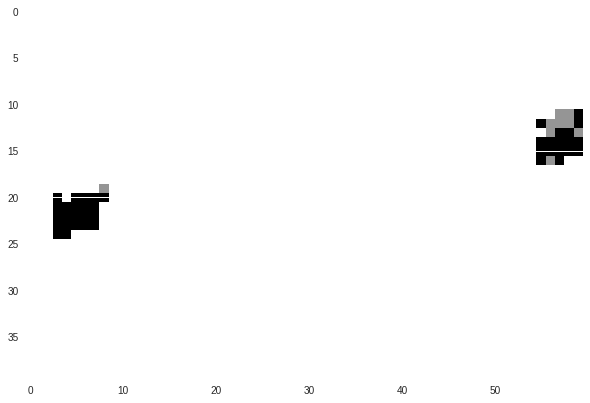

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[0.73691368] for image:3 with k =:3
Average Entropy using neareast neighbours is:2.4448191908928694 for image:3 with k =:3


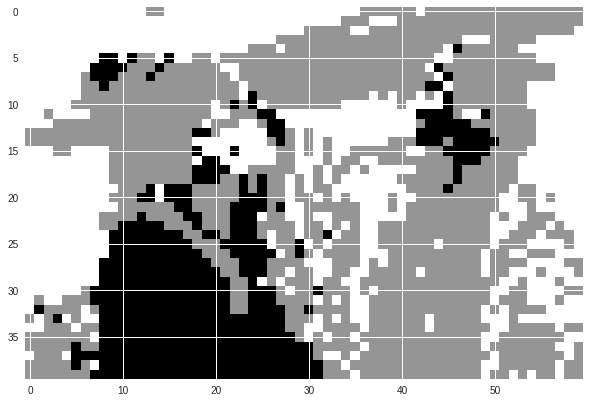

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[1.56293522] for image:3 with k =:3
Average Entropy using rbf gamma 1 is:2.0246628646340334 for image:3 with k =:3


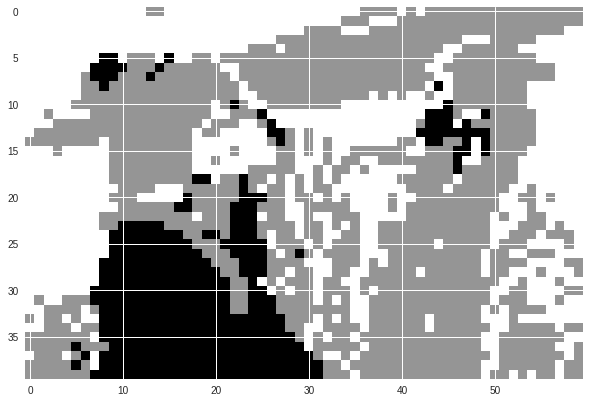

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[1.59012993] for image:3 with k =:3
Average Entropy using rbf gamma 10 is:2.034055392152337 for image:3 with k =:3


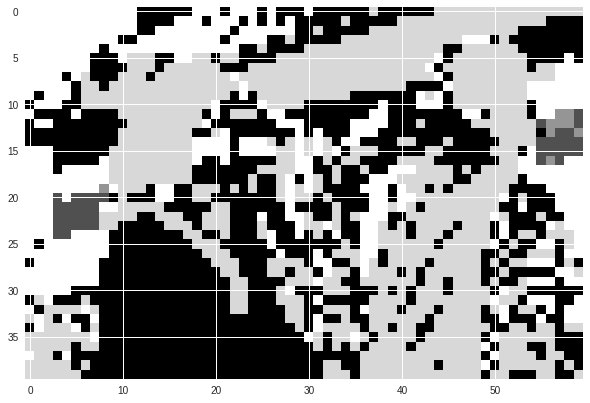

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[1.49605884] for image:3 with k =:5
Average Entropy using neareast neighbours is:2.1322931295786858 for image:3 with k =:5


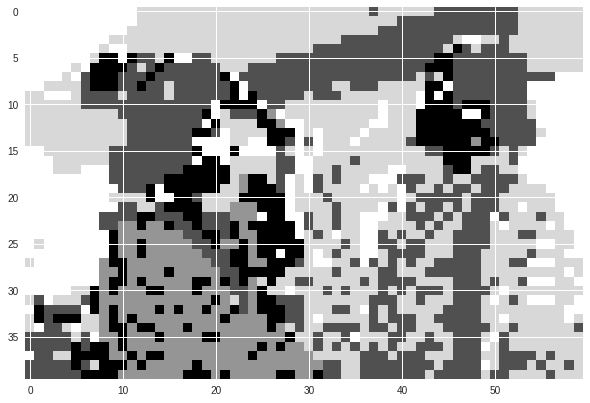

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.13488033] for image:3 with k =:5
Average Entropy using rbf gamma 1 is:1.8282453077462644 for image:3 with k =:5


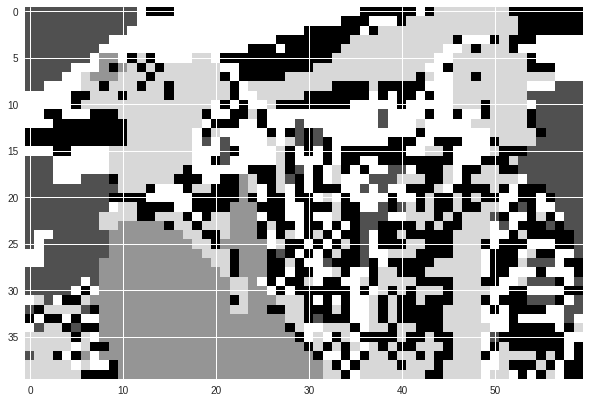

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[2.18556419] for image:3 with k =:5
Average Entropy using rbf gamma 10 is:1.8665186975994945 for image:3 with k =:5


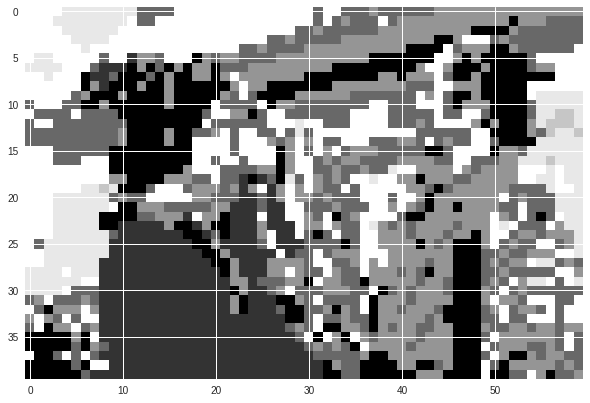

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[2.65840864] for image:3 with k =:7
Average Entropy using neareast neighbours is:1.8253860570152238 for image:3 with k =:7


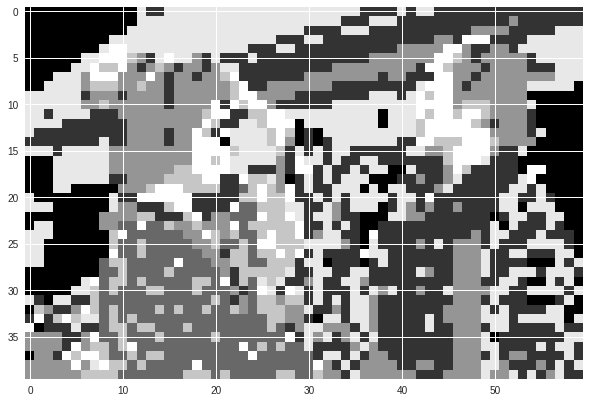

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[2.94790968] for image:3 with k =:7
Average Entropy using rbf gamma 1 is:1.7061663638499092 for image:3 with k =:7


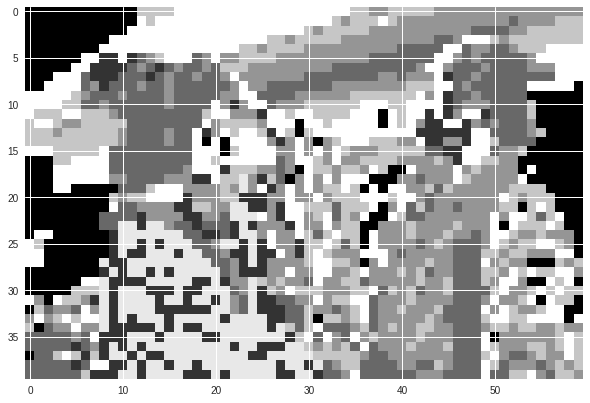

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[2.75874591] for image:3 with k =:7
Average Entropy using rbf gamma 10 is:1.798351846226765 for image:3 with k =:7


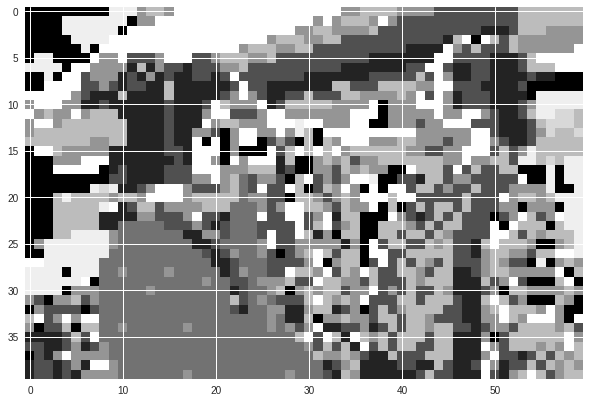

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[3.10010623] for image:3 with k =:9
Average Entropy using neareast neighbours is:1.809457392757908 for image:3 with k =:9


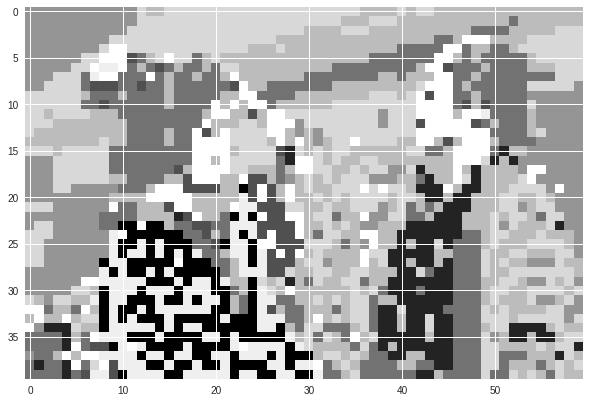

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[3.76142153] for image:3 with k =:9
Average Entropy using rbf gamma 1 is:1.6340597619441006 for image:3 with k =:9


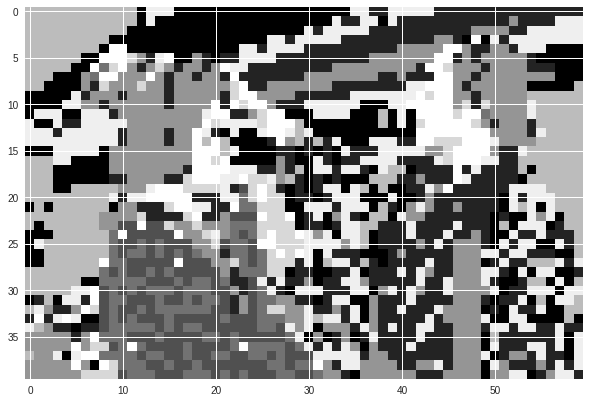

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[3.46433309] for image:3 with k =:9
Average Entropy using rbf gamma 10 is:1.6752926148302756 for image:3 with k =:9


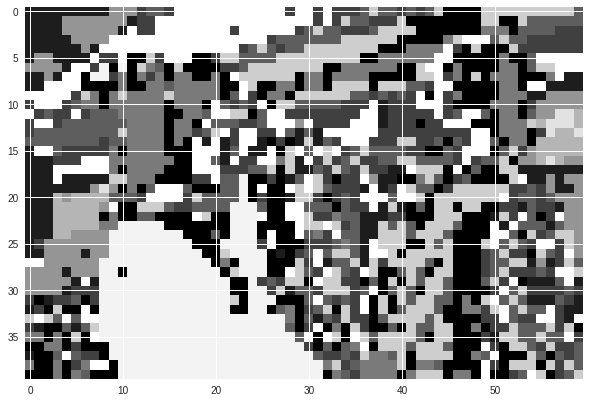

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[3.58417554] for image:3 with k =:11
Average Entropy using neareast neighbours is:1.7336560835582482 for image:3 with k =:11


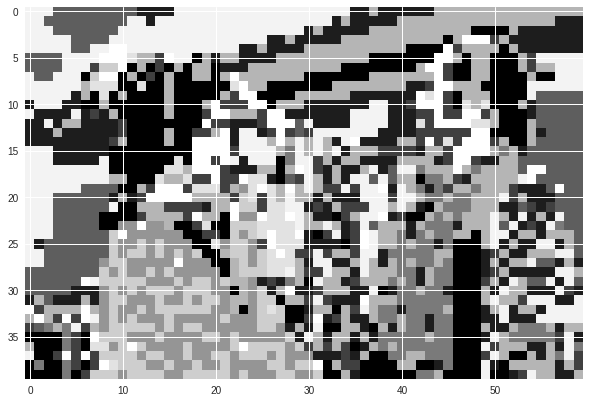

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[4.03520337] for image:3 with k =:11
Average Entropy using rbf gamma 1 is:1.6082095921818447 for image:3 with k =:11


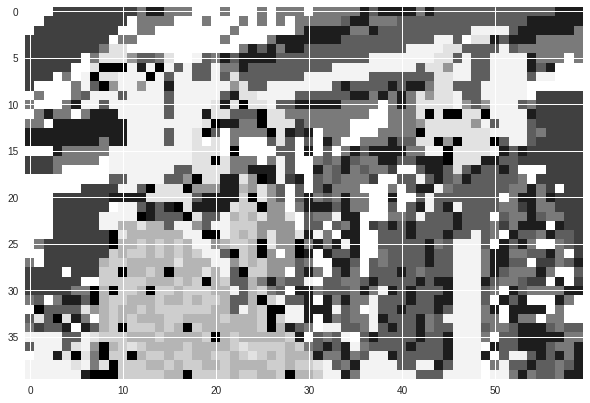

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 10 is:[3.69891909] for image:3 with k =:11
Average Entropy using rbf gamma 10 is:1.6644204433107554 for image:3 with k =:11
Original Image 4


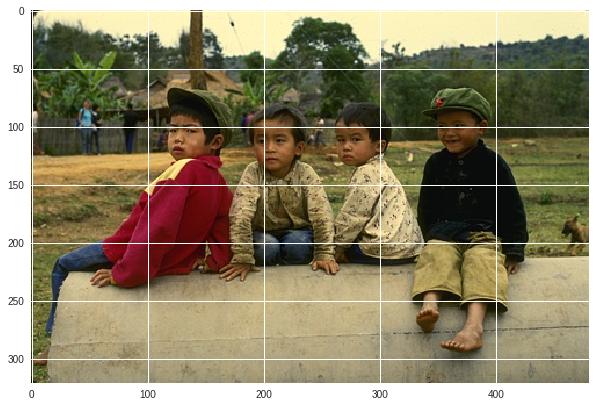

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


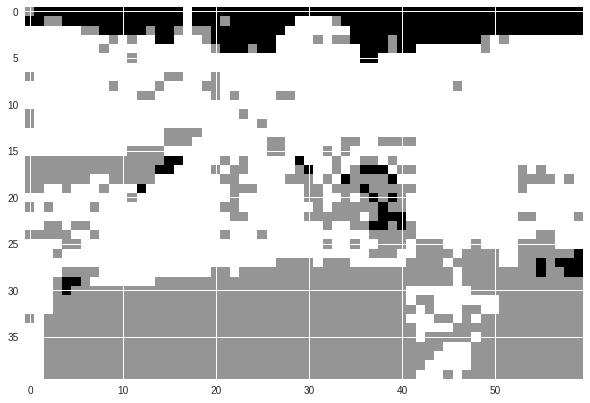

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[1.99138508] for image:4 with k =:3
Average Entropy using neareast neighbours is:2.0136738717857625 for image:4 with k =:3


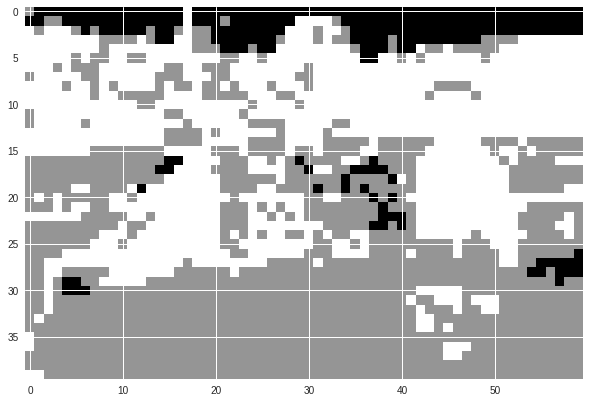

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[1.90107956] for image:4 with k =:3
Average Entropy using rbf gamma 1 is:2.033998542594599 for image:4 with k =:3


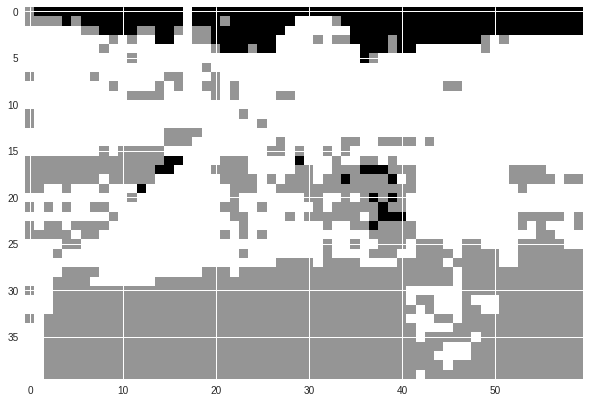

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[2.03461537] for image:4 with k =:3
Average Entropy using rbf gamma 10 is:1.9966383336509097 for image:4 with k =:3


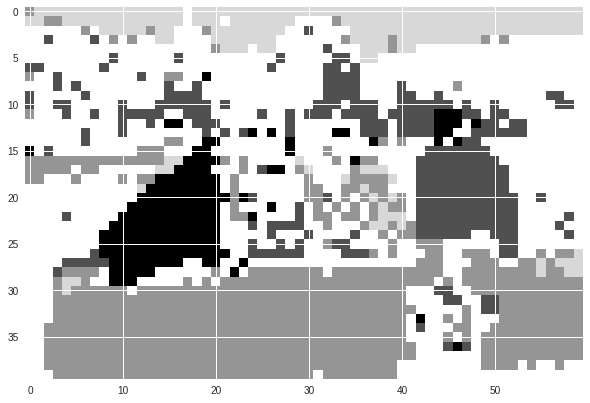

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[3.28570961] for image:4 with k =:5
Average Entropy using neareast neighbours is:1.7897140750450233 for image:4 with k =:5


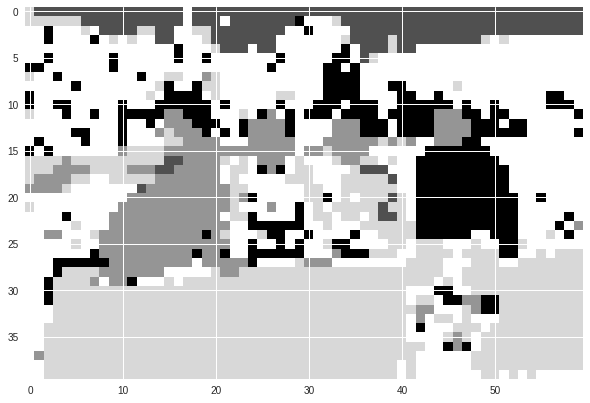

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[3.15374179] for image:4 with k =:5
Average Entropy using rbf gamma 1 is:1.752572952244288 for image:4 with k =:5


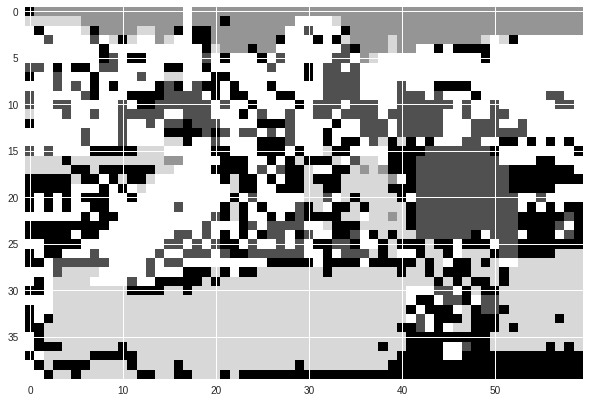

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[2.81651914] for image:4 with k =:5
Average Entropy using rbf gamma 10 is:1.850122090904027 for image:4 with k =:5


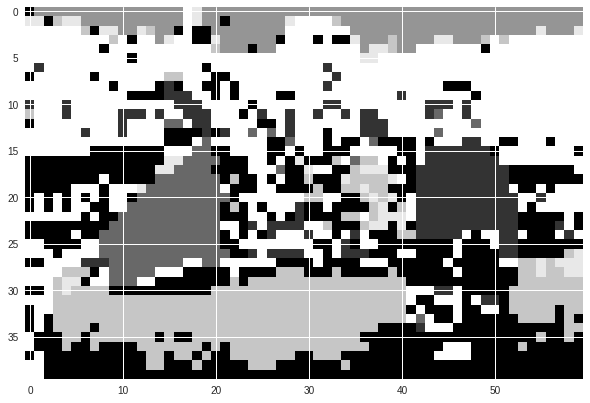

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[4.18739671] for image:4 with k =:7
Average Entropy using neareast neighbours is:1.6720123821855442 for image:4 with k =:7


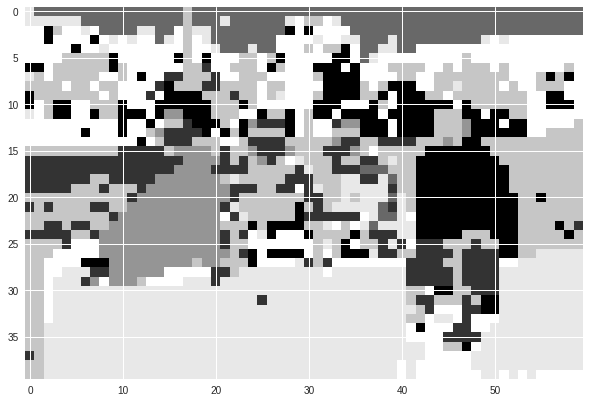

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[4.1590692] for image:4 with k =:7
Average Entropy using rbf gamma 1 is:1.5135627999149197 for image:4 with k =:7


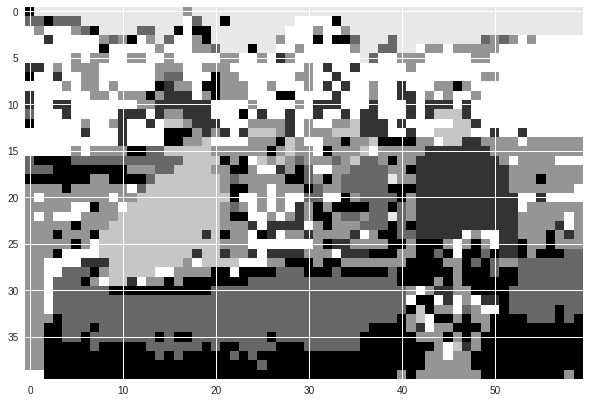

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[4.1552759] for image:4 with k =:7
Average Entropy using rbf gamma 10 is:1.6546174280615062 for image:4 with k =:7


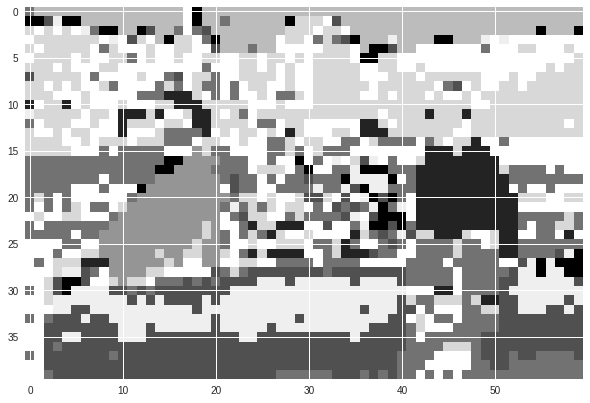

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[4.66430138] for image:4 with k =:9
Average Entropy using neareast neighbours is:1.5922097852210662 for image:4 with k =:9


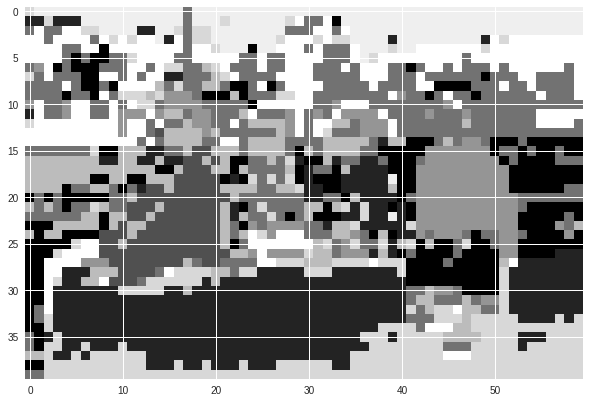

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[5.15143193] for image:4 with k =:9
Average Entropy using rbf gamma 1 is:1.4335597182301627 for image:4 with k =:9


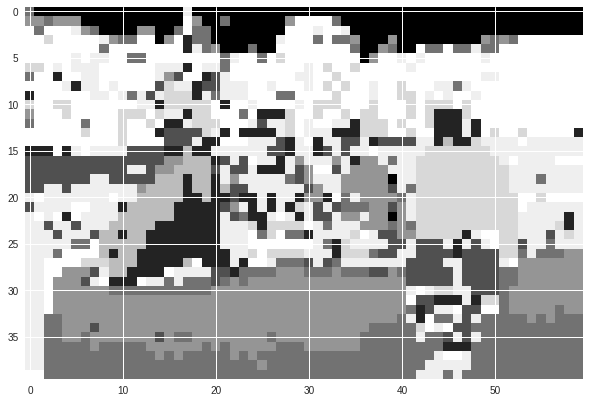

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Average F Measure using rbf gamma 10 is:[4.82782645] for image:4 with k =:9
Average Entropy using rbf gamma 10 is:1.5177355791578344 for image:4 with k =:9


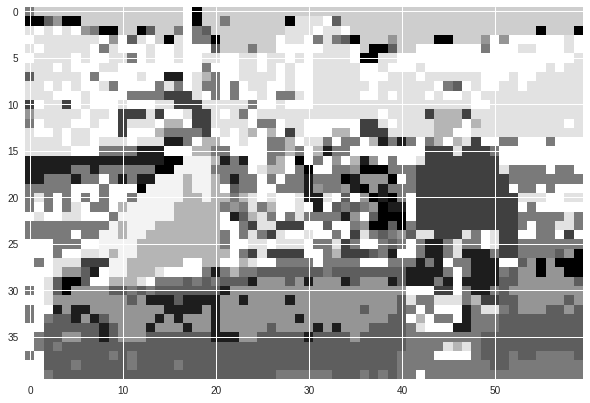

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using nearest neighbours is:[4.98379284] for image:4 with k =:11
Average Entropy using neareast neighbours is:1.5690296818461091 for image:4 with k =:11


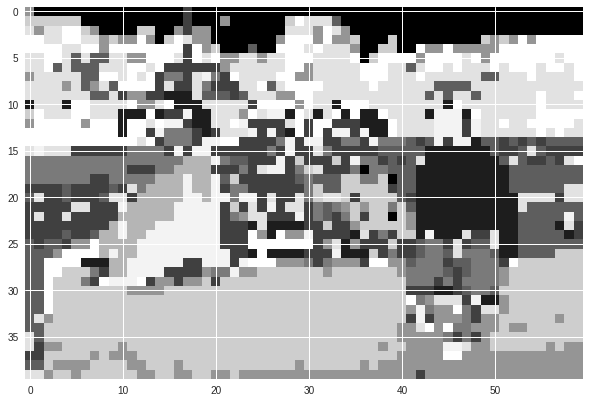

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Average F Measure using rbf gamma 1 is:[5.63539328] for image:4 with k =:11
Average Entropy using rbf gamma 1 is:1.3862394504991375 for image:4 with k =:11


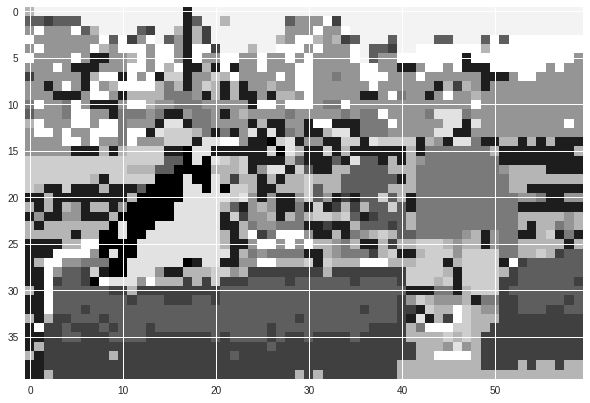

Average F Measure using rbf gamma 10 is:[5.3210509] for image:4 with k =:11
Average Entropy using rbf gamma 10 is:1.4578195593076295 for image:4 with k =:11


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [0]:
# apply normalized cut segmentation on "5" images and their associated ground truth(s) 
# and calculating f-measure, cross entropy loss
from skimage.transform import resize
from skimage import img_as_uint

for i in range(5):
  no_samples = np.shape(segmentations[image_ids[i]+ '.mat']['groundTruth'])[1]
  print(f'Original Image {i}')
  org = images[image_ids[i]+'.jpg']
  aorgplot = plt.imshow(org)
  plt.show()
  # for every input image try different K value.
  ks = [3, 5, 7, 9, 11]
  for k in ks:
    seg_img = perform_spectral_clustering(image_ids[i]+'.jpg','nearest_neighbors',k,nn= 5)
    avg_f=0
    avg_ent=0
    for M in range(no_samples):
      gt=segmentations[image_ids[i]+ '.mat']['groundTruth'][0][M]['Segmentation'][0][0]
      gt= resize(gt, (40,60))
      gt = img_as_uint(gt)
      avg_f+=f_measure(seg_img,gt)
      avg_ent+=calculate_conditional_entropy(seg_img,gt)
    avg_f=avg_f/no_samples
    avg_ent=avg_ent/no_samples
    print(f'Average F Measure using nearest neighbours is:{avg_f}',f'for image:{i}',f'with k =:{k}')
    print(f'Average Entropy using neareast neighbours is:{avg_ent}',f'for image:{i}',f'with k =:{k}')
    print('==================================')
    seg_img = perform_spectral_clustering(image_ids[i]+'.jpg','rbf',k,gamma = 1,nn= 5)
    avg_f=0
    avg_ent=0
    for M in range(no_samples):
      gt=segmentations[image_ids[i]+ '.mat']['groundTruth'][0][M]['Segmentation'][0][0]
      gt= resize(gt, (40,60))
      gt = img_as_uint(gt)
      avg_f+=f_measure(seg_img,gt)
      avg_ent+=calculate_conditional_entropy(seg_img,gt)
    avg_f=avg_f/no_samples
    avg_ent=avg_ent/no_samples
    print(f'Average F Measure using rbf gamma 1 is:{avg_f}',f'for image:{i}',f'with k =:{k}')
    print(f'Average Entropy using rbf gamma 1 is:{avg_ent}',f'for image:{i}',f'with k =:{k}')
    print('==================================')
    seg_img = perform_spectral_clustering(image_ids[i]+'.jpg','rbf',k,gamma = 10,nn= 5)
    avg_f=0
    avg_ent=0
    for M in range(no_samples):
      gt=segmentations[image_ids[i]+ '.mat']['groundTruth'][0][M]['Segmentation'][0][0]
      gt= resize(gt, (40,60))
      gt = img_as_uint(gt)
      avg_f+=f_measure(seg_img,gt)
      avg_ent+=calculate_conditional_entropy(seg_img,gt)
    avg_f=avg_f/no_samples
    avg_ent=avg_ent/no_samples
    print(f'Average F Measure using rbf gamma 10 is:{avg_f}',f'for image:{i}',f'with k =:{k}')
    print(f'Average Entropy using rbf gamma 10 is:{avg_ent}',f'for image:{i}',f'with k =:{k}')
    print('==================================')

    

    


In [0]:
#visualize certain image
def visualize_image_segmentation(image_id):
  plt.rcParams["figure.figsize"] = [30, 30]
  no_samples = np.shape(segmentations[image_id + '.mat']['groundTruth'])[1]
  f, ax = plt.subplots(2, no_samples + 1)
  img = ax[0][0].imshow(images[image_id + '.jpg'])
  img2 = ax[1][0].imshow(images[image_id + '.jpg'])
  for j in range(no_samples):
    ax[0][j + 1].imshow(segmentations[image_id + '.mat']['groundTruth'][0][j]['Segmentation'][0][0])
    ax[1][j + 1].imshow(segmentations[image_id + '.mat']['groundTruth'][0][j]['Boundaries'][0][0])
    



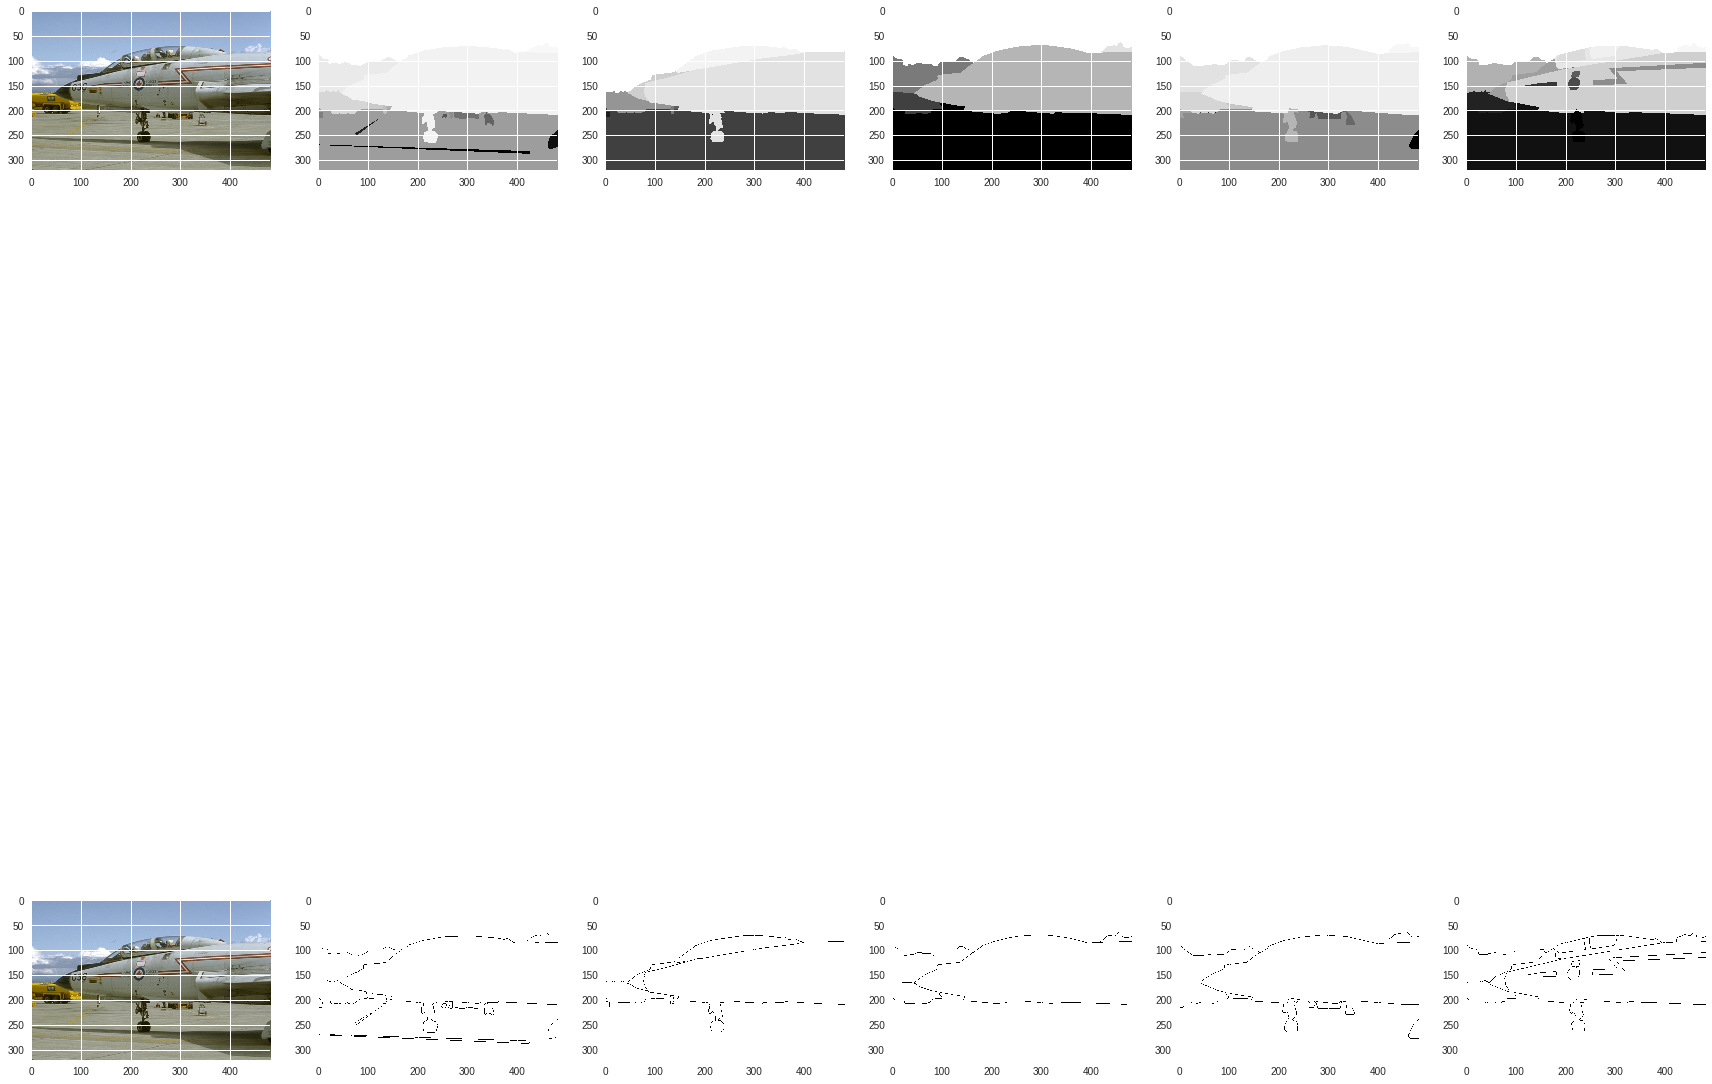

In [0]:
#testing visualizing
visualize_image_segmentation('10081')

In [0]:
#applying spectral clustering
from sklearn.cluster import SpectralClustering
from skimage.transform import resize
from skimage import img_as_uint

resized_h = 40
resized_w = 60
def perform_spectral_clustering (image_id, affn,clusters_no, gamma = 1.0, nn = 5):
  img = images[image_id]
  row_size = np.size(img,0)
  column_size = np.size(img,1)
  img = resize(img, (resized_h,resized_w))
  img = img.reshape(resized_h * resized_w, 3)
  clustering = SpectralClustering(affinity=affn, assign_labels='discretize', eigen_solver=None, eigen_tol=0.0, gamma=gamma,n_neighbors=nn,
           n_clusters=clusters_no, n_init=10, n_jobs=None,random_state=0)
  segmented_img = clustering.fit_predict(img)
  segmented_img = np.reshape(segmented_img, (resized_h,resized_w))
  plt.rcParams["figure.figsize"] = [10, 10]
  plt.imshow(segmented_img)
  plt.show()
  return segmented_img
  



/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


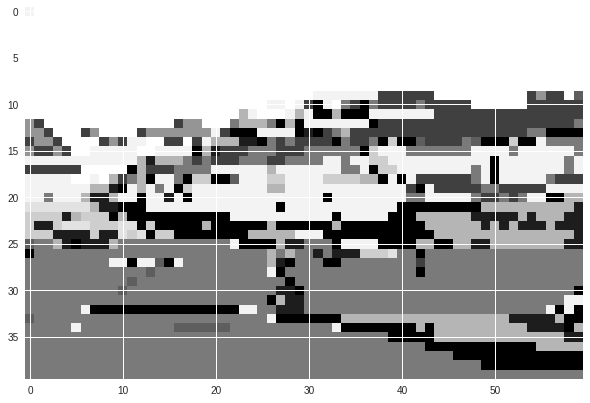

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 6,  6,  6, ..., 10, 10, 10],
       [ 6,  6,  6, ..., 10, 10, 10],
       [ 6,  6,  6, ...,  6,  6,  6]])

In [0]:
#testing normalized cut
perform_spectral_clustering('10081.jpg','rbf',11,gamma = 10.0)


In [0]:
from __future__ import division

#peform conditional entropy
def calculate_conditional_entropy(segmented_img, gt):
  clusters, ccounts = np.unique(segmented_img, return_counts=True);
  total_value = 0;
  total_pixels = np.sum(ccounts)
  for s in range (np.size(clusters,0)):
    pos = np.where(segmented_img == clusters[s])
    partition = gt[pos]
    cluster_size = np.size(partition, 0)
    parts, partscount = np.unique(partition, return_counts=True)
    fractions = partscount / cluster_size
    probabilities = np.log(fractions)
    neg_fractions = fractions * -1;
    entropy = np.sum(neg_fractions * probabilities)
    total_value = total_value  + ((cluster_size / total_pixels) * entropy)
  return total_value
    

  


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


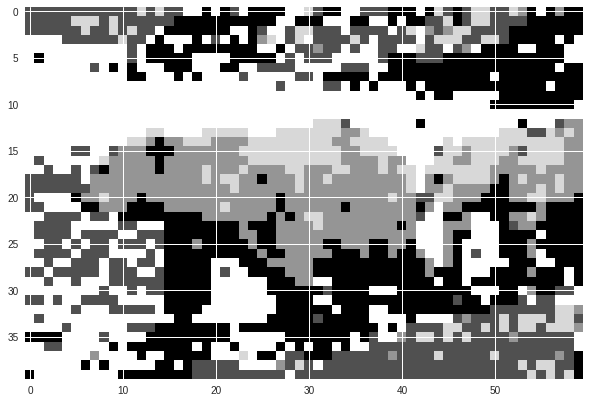

5
0.7641600431953826


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [0]:
#testing F entropy cell
from skimage.transform import resize
from skimage import img_as_uint

seg_img = perform_spectral_clustering('100075.jpg','nearest_neighbors',5,nn= 5)
gt=segmentations['100075' + '.mat']['groundTruth'][0][1]['Segmentation'][0][0]
gt= resize(gt, (40,60))
gt = img_as_uint(gt)
ent = calculate_conditional_entropy(seg_img,gt)
print(ent)




Image has Coverged


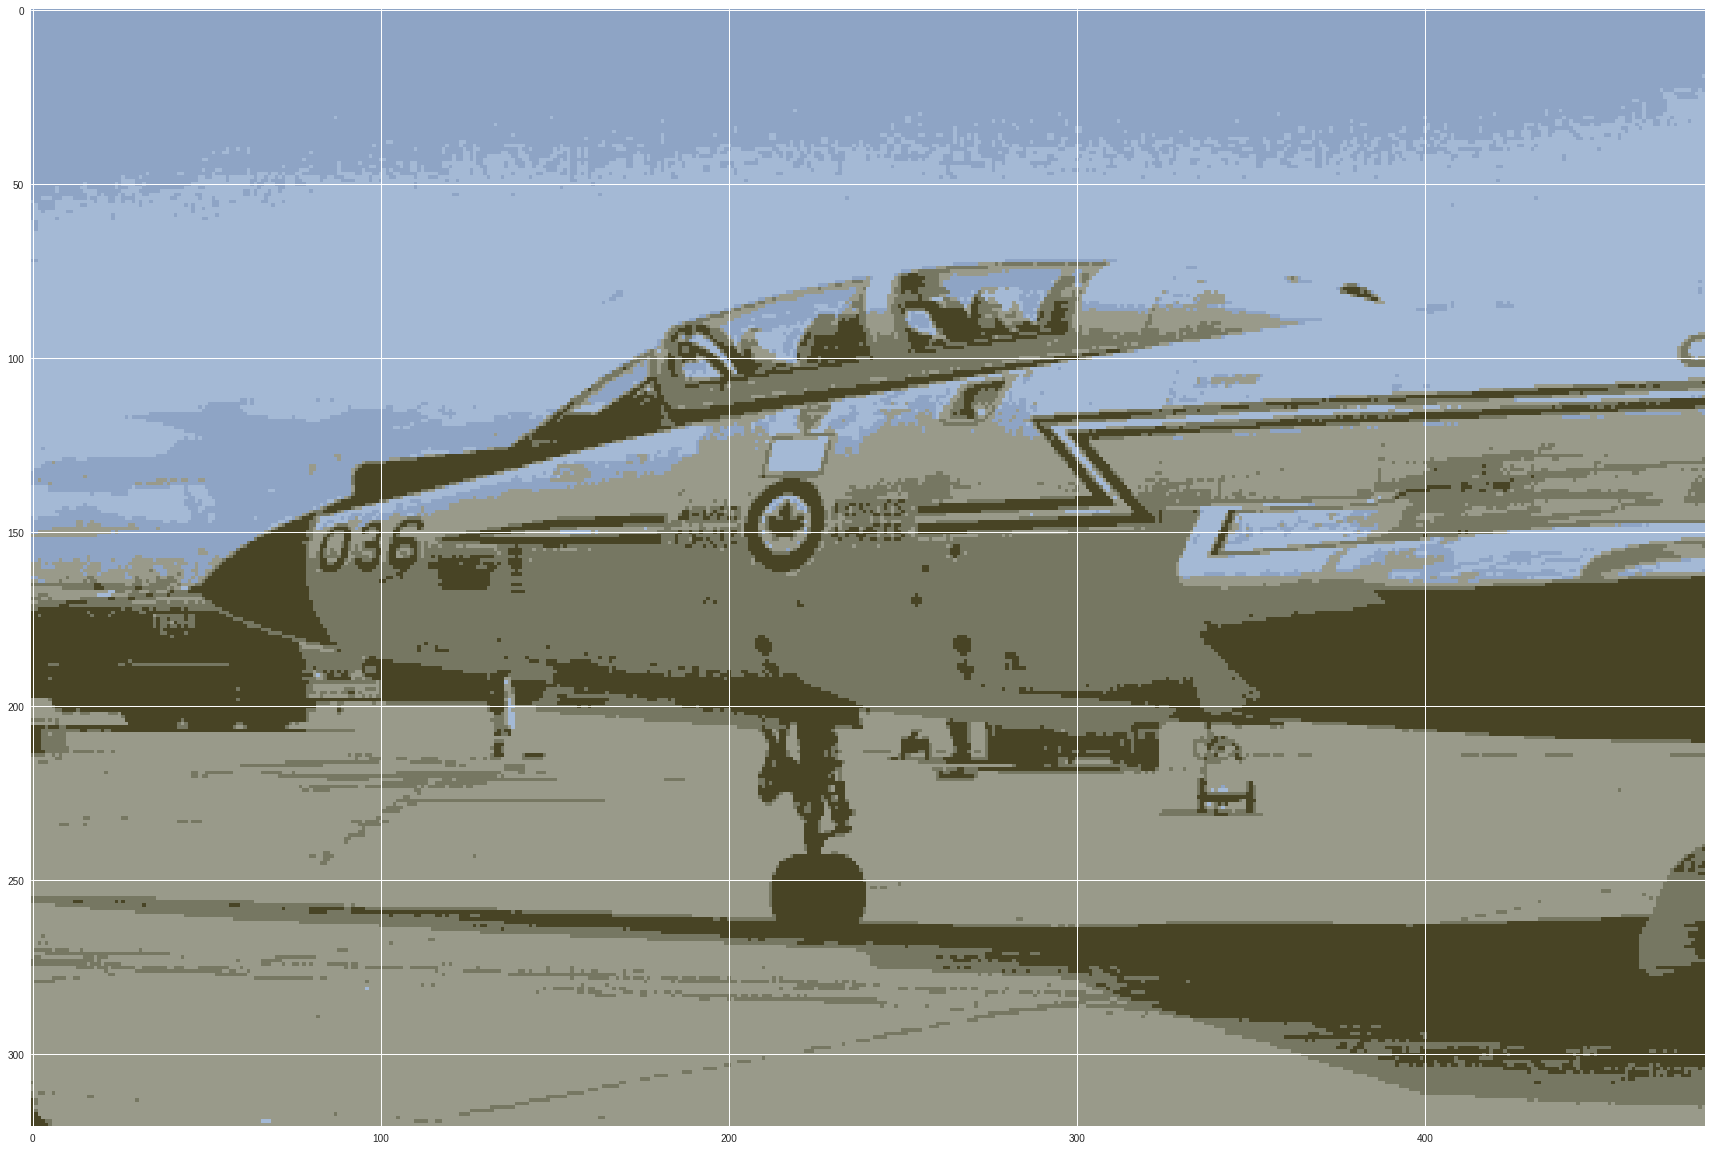

In [0]:
# Image Segmentation using K-means Clustering 
from PIL import Image
import numpy
import math
import random

clusters=[[] for i in range(15)]
ks = [3, 5, 7, 9, 11]
# for every input image try different K value.
# for image in images:
#     for k in ks:
#       clusters= [[]]
image  = Image.fromarray(images['10081.jpg']).convert('RGB')
res, grey_scale_res= kmeans(image, 5)
img = Image.fromarray(res.astype('uint8'))
imgplot = plt.imshow(img)
#imgplot = plt.imshow(grey_scale_res)


In [0]:
# Return k centroids RGB triples.
import random
def get_centroids(im,k):
	cents=[]
	for i in range(k):
		x=random.randrange(im.size[0])
		y=random.randrange(im.size[1])
		cents.append(im.getpixel((x,y)))
	return cents

In [0]:
# Finds the nearest centroid and set the clusters
def argmindistance(pixel, centroids):
	distance=[]
	for c in centroids:
		distance.append(math.sqrt((c[0]-pixel[0])**2+(c[1]-pixel[1])**2+(c[2]-pixel[2])**2))
	minindex=numpy.argmin(distance)
	clusters[minindex].append(pixel)
	return minindex

In [0]:
# get average RGB of 
def getAverageRGB(arr):
	r = 0
	g = 0
	b = 0
	counter=len(arr)
	for x in range(len(arr)):
		r+=arr[x][0]
		g+=arr[x][1]
		b+=arr[x][2]
	rAvg = r/counter
	gAvg = g/counter
	bAvg = b/counter
	return (rAvg, gAvg, bAvg)

In [0]:
# perform Kmeans given a certain image and k as input
import numpy
def kmeans(im,k):
  h=im.size[0]
  w=im.size[1]

  centroids=get_centroids(im,k)
  oldcentroids= [[] for i in range(k)]
  ###
  grey_scale_centroids= [[] for i in range(k)]
  ###
  labels=numpy.zeros((h,w))

  for i in range(30):
    for x in range(h):
      for y in range(w):
        labels[x][y]=argmindistance(im.getpixel((x,y)),centroids)

    index=0
    for cluster in clusters:
      if(len(cluster) !=0):
        oldcentroids[index] = centroids[index]
        centroids[index]=getAverageRGB(cluster)
        ###
        grey_scale_centroids[index] = index
        ###
        index+=1

  print("Image has Coverged")
  centers=numpy.array(centroids)
  labels=numpy.transpose(numpy.uint8(labels))
  res=centers[labels]
  ###
  grey_centers = numpy.array(grey_scale_centroids)
  grey_scale_res = grey_centers[labels]
  ###
  img = Image.fromarray(res.astype('uint8'))
  imgplot = plt.imshow(img)
  plt.show()
  return res, grey_scale_res

In [0]:
#Gets f measure by comparing an image to one of its ground truth images
#paramters of function are image segmented and ground truth as arrays
def f_measure(image,gt):
  clusters, ccounts = np.unique(image, return_counts=True)
  F= 0 
  for s in range (0,clusters.shape[0]):
    pos = np.where(image==clusters[s])
    partition= gt[pos]
    partitions, pcounts = np.unique(partition, return_counts=True)
    gtpartitions,gtcounts= np.unique(gt,return_counts=True)
    idx = np.argmax(pcounts)
    lookfor= partitions[idx]
    current= np.where(gtpartitions==lookfor)
    currentCount = gtcounts[current]
    
    purity =(np.amax(pcounts))/partition.shape[0]  #precision = purity
    recall = (np.amax(pcounts))/currentCount
    F_cluster=(2*purity*recall)/(purity+recall)
    F+=F_cluster
#     print(f'F_cluster:{F_cluster}') 
  return F

In [0]:
f_measure(grey_scale_res,segmentations['94079.mat']['groundTruth'][0][0]['Segmentation'][0][0])

In [0]:
# apply k means segmentation for all dataset images and their associated ground truth(s) 
# and calculating f-measure, cross entropy loss
from PIL import Image
import numpy
import math
import random

avg_f=0
avg_ent=0
for i in range(200):
  no_samples = np.shape(segmentations[image_ids[i]+ '.mat']['groundTruth'])[1]
  org = images[image_ids[i]+'.jpg']
  image  = Image.fromarray(images[image_ids[i]+'.jpg']).convert('RGB')
  clusters=[[] for i in range(15)]
  # for every input image try different K value.
  ks = [3, 5, 7, 9, 11]
  for k in ks:
    clusters=[[] for i in range(15)]
    res,grey_scale_res= kmeans(image, k)
    img = Image.fromarray(res.astype('uint8'))
    imgplot = plt.imshow(img)
    for M in range(no_samples):
      avg_f+=f_measure(grey_scale_res,segmentations[image_ids[i] + '.mat']['groundTruth'][0][M]['Segmentation'][0][0])
      avg_ent+=calculate_conditional_entropy(grey_scale_res,segmentations[image_ids[i] + '.mat']['groundTruth'][0][M]['Segmentation'][0][0])
avg_f=avg_f/1000
avg_ent=avg_ent/1000
    
print(avg_f)  
print(avg_ent)


In [0]:
# apply normalized cut segmentation on all dataset images and their associated ground truth(s) 
# and calculating f-measure, cross entropy loss
from skimage.transform import resize
from skimage import img_as_uint

for i in range(200):
  no_samples = np.shape(segmentations[image_ids[i]+ '.mat']['groundTruth'])[1]
  print(f'Original Image {i}')
  org = images[image_ids[i]+'.jpg']
  # for every input image try different K value.
  avg_f=0
  avg_ent=0
    
  ks = [3, 5, 7, 9, 11]
  for k in ks:
    seg_img = perform_spectral_clustering(image_ids[i]+'.jpg','nearest_neighbors',k,nn= 5)
    for M in range(no_samples):
      gt=segmentations[image_ids[i]+ '.mat']['groundTruth'][0][M]['Segmentation'][0][0]
      gt= resize(gt, (40,60))
      gt = img_as_uint(gt)
      avg_f+=f_measure(seg_img,gt)
      avg_ent+=calculate_conditional_entropy(seg_img,gt)
    
    seg_img = perform_spectral_clustering(image_ids[i]+'.jpg','rbf',k,gamma = 1,nn= 5)
    for M in range(no_samples):
      gt=segmentations[image_ids[i]+ '.mat']['groundTruth'][0][M]['Segmentation'][0][0]
      gt= resize(gt, (40,60))
      gt = img_as_uint(gt)
      avg_f+=f_measure(seg_img,gt)
      avg_ent+=calculate_conditional_entropy(seg_img,gt)
    
    seg_img = perform_spectral_clustering(image_ids[i]+'.jpg','rbf',k,gamma = 10,nn= 5)
    for M in range(no_samples):
      gt=segmentations[image_ids[i]+ '.mat']['groundTruth'][0][M]['Segmentation'][0][0]
      gt= resize(gt, (40,60))
      gt = img_as_uint(gt)
      avg_f+=f_measure(seg_img,gt)
      avg_ent+=calculate_conditional_entropy(seg_img,gt)
avg_f=avg_f/3000
avg_ent=avg_ent/3000
    
print(avg_f)  
print(avg_ent)